### Постановка задачи и описание целей и этапов исследования.  
**ДАНО:** Развлекательное приложения Procrastinate Pro+. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.  
**Надо** Разобраться в причинах и помочь компании выйти в плюс.  
**Основные этапы**  
- загрузка и ознакомление с данными
- подготовка и предобработка данных
- исследовательский анализ данных, включая анализы
- - откуда приходят пользователи и какими устройствами они пользуются
- - какие рекламные каналы используются для привлечения пользователей
- анализ маркетинговой политики, включая
- - определение общей суммы расходов на рекламу и средняя стоимость привлечения одного клиента
- анализ окупаемости рекламы, включая 
- - сколько денег приносит каждый клиент
- - когда расходы на привлечение клиента окупаются
- - какие факторы мешают привлечению клиентов
- выводы и рекомендации

### Загрузите данные и подготовьте их к анализу

#### Загрузка библиотек и данных

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [29]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

display('Датасет "visits"', visits.shape)
visits.info()
display(visits.columns)
display(visits.head())


display('Датасет "orders"', orders.shape)
orders.info()
display(orders.columns)
display(orders.head())


display('Датасет "costs"', costs.shape)
costs.info()
display(costs.columns)
display(costs.head())


'Датасет "visits"'

(309901, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


'Датасет "orders"'

(40212, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


'Датасет "costs"'

(1800, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Index(['dt', 'Channel', 'costs'], dtype='object')

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Раздел 1.1. ИТОГО:**  
**1. Загрузили библиотеки.  
2. Загрузили данные.  
3. Просмотрели общую информацию по загруженным данным.**

#### Предобработка данных

##### Переименование столбцов (единый регистр, устранение пробелов)

In [30]:
# переименование столбцов (единый регистр, устранение пробелов)
# определим ф-цию, устанавливающую заданный регистр и заменяющую пробелы
def change_reg_wspace(fd, reg, symb):
    fd.columns = fd.columns.str.replace(' ', symb) # заменяем пробелы " " на symb
    col = fd.columns
    if reg == 'lower':
        for elem in col:
            fd = fd.rename(columns={elem:elem.lower()}) # устанавливаем нижний регистр
    elif reg == 'upper':
        for elem in col:
            fd = fd.rename(columns={elem:elem.upper()}) # устанавливаем верхний регистр
    else: print('change_reg(fd, reg): НЕПОНЯТНЫЙ РЕГИСТР!')
    return fd

visits = change_reg_wspace(visits, 'lower', '_')
print(visits.columns)

orders = change_reg_wspace(orders, 'lower', '_')
print(orders.columns)

costs = change_reg_wspace(costs, 'lower', '_')
print(costs.columns)
    

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


##### Приведение данных дат и времени к типу datetime

In [31]:
#приведение временных данных к типу datetime
visits[['session_start', 'session_end']] = visits[['session_start', 'session_end']].apply(pd.to_datetime)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

print(visits['session_start'].dtype, visits['session_end'].dtype, orders['event_dt'].dtype, costs['dt'].dtype)


datetime64[ns] datetime64[ns] datetime64[ns] datetime64[ns]


##### Проверка на явные/неявные дубликаты, аномальные значения

In [32]:
# проверим наличие явных дубликатов
display('Кол-во явных дубликатов в данных:', visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

# проверим наличие неявных дубликатов
display(visits['region'].unique(), visits['device'].unique(), visits['channel'].unique())
display(costs['channel'].unique())

display(visits['session_start'].min(), visits['session_start'].max(), visits['session_end'].min(), visits['session_end'].max())
display(orders['event_dt'].min(), orders['event_dt'].max(), costs['dt'].min(), costs['dt'].max())
display(orders['revenue'].value_counts(), costs['costs'].value_counts(), costs['costs'].min(), costs['costs'].max())

visits['duration'] = (pd.to_datetime(visits['session_end']) - pd.to_datetime(visits['session_start'])).dt.total_seconds() 
display(visits['duration'].min(), visits['duration'].max(), len(visits['duration'].unique()), visits['duration'].value_counts())

t=[]
ti=[]
for i in range(0, 390, 10):
    ti.append(i*60)
    t.append(visits.query('duration <= @i*60')['duration'].count())
display(len(ti), len(t), ti, t)


'Кол-во явных дубликатов в данных:'

0

0

0

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-31 23:59:23')

Timestamp('2019-05-01 00:07:06')

Timestamp('2019-11-01 01:38:46')

Timestamp('2019-05-01 00:28:11')

Timestamp('2019-10-31 23:56:56')

Timestamp('2019-05-01 00:00:00')

Timestamp('2019-10-27 00:00:00')

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
217.80     1
186.20     1
176.70     1
273.00     1
55.00      1
Name: costs, Length: 608, dtype: int64

0.8

630.0

0.0

22257.0

10339

15.0       201
143.0      193
58.0       192
78.0       190
25.0       189
          ... 
12977.0      1
11512.0      1
16684.0      1
10626.0      1
8558.0       1
Name: duration, Length: 10339, dtype: int64

39

39

[0,
 600,
 1200,
 1800,
 2400,
 3000,
 3600,
 4200,
 4800,
 5400,
 6000,
 6600,
 7200,
 7800,
 8400,
 9000,
 9600,
 10200,
 10800,
 11400,
 12000,
 12600,
 13200,
 13800,
 14400,
 15000,
 15600,
 16200,
 16800,
 17400,
 18000,
 18600,
 19200,
 19800,
 20400,
 21000,
 21600,
 22200,
 22800]

[163,
 87878,
 151186,
 195996,
 228150,
 251356,
 268084,
 279828,
 288357,
 294385,
 298821,
 301890,
 304163,
 305795,
 306999,
 307797,
 308391,
 308834,
 309139,
 309324,
 309477,
 309598,
 309685,
 309752,
 309784,
 309810,
 309838,
 309853,
 309871,
 309879,
 309887,
 309890,
 309895,
 309899,
 309900,
 309900,
 309900,
 309900,
 309901]

**Раздел 1.2. ИТОГО:**  
**1. Пропуски в данных отсутствуют.  
2. Наименования столбцов переведены в нижний регистр, пробелы в названиях заменены нижним подчеркиванием.  
3. Тип данных дат и времени установлен timedate.  
4. Явные дубликаты отсутствуют.  
5. Неявные дубликаты не обнаружены.  
6. Аномальные значения не выявлены.  
7. Среди всех представленных сессий, длительность сессий менее 10 сек - 0,6%, от 10 сек до 3 мин - 9%, от 3 до 10 мин - 18,7%, более 10 мин - 72%, что говорит о хорошем качестве сессий.**

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [33]:
# перенесем из теор.части курса необходимые для расчетов метрик и построения графиков поведения метрик ф-ции
def get_profiles(sessions, orders):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) 

    return profiles

def get_profiles_CAC(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date                  #  pd.to_datetime(profiles['dt']) 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
                                                                                       #
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
    ad_costs[['dt', 'channel', 'acquisition_cost']],
    on=['dt', 'channel'],
    how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

# ########################################################################################################################   

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# ########################################################################################################################   

def get_ltv_roi_cac(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

# ########################################################################################################################   

def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()
    
# ########################################################################################################################   

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time     
    
# ########################################################################################################################   
    
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# ########################################################################################################################   

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# ########################################################################################################################     
    
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


#### Профили пользователей, граничные даты привлечения пользователей

In [34]:
# составим профили пользователей
profiles = get_profiles(visits, orders)
display('Датафрейм профилей пользователей profiles:', profiles.head())
# определим минимальную и максимальную даты привлечения пользователей
dt_min = profiles['dt'].min()
dt_max = profiles['dt'].max()
print('Минимальная дата привлечения пользователей dt_min = ', dt_min)
print('Максимальная дата привлечения пользователей dt_max = ', dt_max)


'Датафрейм профилей пользователей profiles:'

,user_id,first_ts,channel,device,region,dt,month,payer
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False


Минимальная дата привлечения пользователей dt_min =  2019-05-01
Максимальная дата привлечения пользователей dt_max =  2019-10-27


**1. Сформированы профили пользователей.  
2. Установлена наиболее ранняя дата привлечения пользователей - 1 мая 2019 года и наиболее поздняя - 27 октября 2019 года.**

#### Страны, из которых приходят пользователи

In [35]:
# определим из каких стран пользователи приходят в приложение и ранжируем страны по убыванию по кол-ву 
# платящих пользователей
prof_reg_pay = profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='nunique')\
        .rename(columns={False:'non_payer', True:'payer'})
prof_reg_pay['user_tot'] = prof_reg_pay['payer'] + prof_reg_pay['non_payer']
prof_reg_pay['payer_ratio,%'] = round(prof_reg_pay['payer']/prof_reg_pay['user_tot']*100,2)
display("Страны, пользователи, плательщики", prof_reg_pay.sort_values(by='payer_ratio,%', ascending=False))


'Страны, пользователи, плательщики'

payer,non_payer,payer,user_tot,"payer_ratio,%"
region,,,,
United States,93100,6902,100002,6.90
Germany,14365,616,14981,4.11
UK,16875,700,17575,3.98
France,16787,663,17450,3.80


**1. Установлены страны, из которых приходят пользователи - США, ФРГ, Великобритания, Франция.  
2. Страной с максимальным числом пользователей являются США (100 002 пользователя), здесь же наибольшая доля платящих пользователей - 6,9%.**

#### Устройства, используемые пользователями.

In [36]:
# определим какие устройства предпочитают пользователи и ранжируем устройства по убыванию кол-ва платящих пользователей
prof_dev_pay = profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='nunique')\
        .rename(columns={False:'non_payer', True:'payer'})
prof_dev_pay['user_tot'] = prof_dev_pay['payer'] + prof_dev_pay['non_payer']
prof_dev_pay['payer_ratio,%'] = round(prof_dev_pay['payer']/prof_dev_pay['user_tot']*100,2)
display("Устройства, пользователи, плательщики", prof_dev_pay.sort_values(by='payer_ratio,%', ascending=False))


'Устройства, пользователи, плательщики'

payer,non_payer,payer,user_tot,"payer_ratio,%"
device,,,,
Mac,28130,1912,30042,6.36
iPhone,51097,3382,54479,6.21
Android,32982,2050,35032,5.85
PC,28918,1537,30455,5.05


**1. Установлены устройства, используемые пользователями - Mac, iPhone, Android, PC.  
2. Наибольшее кол-во пользователей используют iPhone (54 479 пользователя) и Android (35 032 пользователя).  
3. Наибольшее число платящих пользователей также с этих устройств - iPhone (3 382 пользователя) и Android (2 050 пользователя).  
4. Однако максимальная доля платящих пользователей приходят с устройств Mac - 6,36%, в то время, как iPhone - 6,21% и Android - 5,85%.**

#### Каналы привлечения пользователей.

In [37]:
# определим каналы привлечения пользователей и ранжируем каналы по убыванию кол-ва платящих пользователей
prof_channel_pay = profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='nunique')\
        .rename(columns={False:'non_payer', True:'payer'})
prof_channel_pay['user_tot'] = prof_channel_pay['payer'] + prof_channel_pay['non_payer']
prof_channel_pay['payer_ratio,%'] = round(prof_channel_pay['payer']/prof_channel_pay['user_tot']*100,2)
display("Каналы привлечения, пользователи, плательщики", prof_channel_pay.sort_values(by='payer_ratio,%', ascending=False))
display('Общее число всех пользователей, а также неплатящих и платящих среди них:', \
        prof_channel_pay['user_tot'].sum(), prof_channel_pay['non_payer'].sum(), prof_channel_pay['payer'].sum())

'Каналы привлечения, пользователи, плательщики'

payer,non_payer,payer,user_tot,"payer_ratio,%"
channel,,,,
FaceBoom,25587,3557,29144,12.20
AdNonSense,3440,440,3880,11.34
lambdaMediaAds,1924,225,2149,10.47
TipTop,17683,1878,19561,9.60
RocketSuperAds,4096,352,4448,7.91
WahooNetBanner,8100,453,8553,5.30
YRabbit,4147,165,4312,3.83
MediaTornado,4208,156,4364,3.57
LeapBob,8291,262,8553,3.06


'Общее число всех пользователей, а также неплатящих и платящих среди них:'

150008

141127

8881

**1. Установлены каналы привлечения пользователей.  
2. Наиболее массовый канал - organic (56 439 пользователей), с третьим местом по кол-ву платящих пользователей (1 160 пользователей) и последним местом по доле платящих пользователей (2,06%).  
3. Второй по общей численности пользователей - канал FaceBoom (29 144 пользователя) и абсолютный лидер как по общему кол-ву платящих пользователей (3 557 пользователей), так и по их доле (12,2%)**

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на рекламу и распределение по рекламным источникам

In [38]:
# определим общую сумму расходов на рекламу 
display(costs.head())
costs_sum_tot = round(costs['costs'].sum(), 2)
display('Общая сумму расходов на маркетинг:', costs_sum_tot)

# определим распределение расходов по рекламным источникам 
distr_mark_pay = costs.groupby('channel')['costs'].sum().sort_values(ascending=False).reset_index()

distr_mark_pay['%_tot_exp'] = round(distr_mark_pay['costs']/costs_sum_tot*100,2)
display('Распределение рекламных расходов по источникам рекламы:', distr_mark_pay)

distr_mark_pay_2 = costs.query('channel == "TipTop" | channel == "FaceBoom"')['costs'].sum() 
display('Сумма расходов на маркетинг через TipTop и FaceBoom:', distr_mark_pay_2, \
        'в % от общей суммы рекламных расходов:', round(distr_mark_pay_2/costs['costs'].sum()*100, 2))

distr_mark_pay_8 = costs.query('channel != "TipTop" & channel != "FaceBoom"')['costs'].sum() 
display('Сумма расходов на маркетинг через 8 других рекламных источников:', distr_mark_pay_8, \
        'в % от общей суммы рекламных расходов:', round(distr_mark_pay_8/costs['costs'].sum()*100, 2))

costs['dt'] = (pd.to_datetime(costs['dt'])).dt.date # меняем тип данных на object, иначе конфликт внутри ф-ции get_profiles_CAC, 
# где происходит объединение таблиц ad_costs и new_user по столбцу 'dt' (тип object в ф-ции); меняем через pd.to_datetime,
# поскольку, если у costs['dt'] уже был тип object, то возникнет ошибка здесь, т.к. .dt.date к типу object не применяется.

profiles_CAC = get_profiles_CAC(visits, orders, events, costs, event_names=[])
display(profiles_CAC.head())
distr_mark_pay_2 = profiles_CAC.groupby('channel')['acquisition_cost'].sum().sort_values(ascending=False).reset_index()
display('Распределение рекламных расходов по источникам рекламы:', distr_mark_pay_2)



,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


'Общая сумму расходов на маркетинг:'

105497.3

'Распределение рекламных расходов по источникам рекламы:'

,channel,costs,%_tot_exp
0,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
2,WahooNetBanner,5151.00,4.88
3,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
6,LeapBob,1797.60,1.70
7,lambdaMediaAds,1557.60,1.48
8,MediaTornado,954.48,0.90
9,YRabbit,944.22,0.90


'Сумма расходов на маркетинг через TipTop и FaceBoom:'

87196.9

'в % от общей суммы рекламных расходов:'

82.65

'Сумма расходов на маркетинг через 8 других рекламных источников:'

18300.4

'в % от общей суммы рекламных расходов:'

17.35

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


'Распределение рекламных расходов по источникам рекламы:'

,channel,acquisition_cost
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


**1. Общая сумма расходов на рекламу составила - 105 497,30.  
2. Максимальные суммы отправлены на рекламу через TipTop - 54 751.30 и FaceBoom - 32 445,60 и это составляет 82,65% от суммы всех рекламных расходов.  
3. На остальные 8 источников в многие разы меньше - 18 300,40, что составляет 17,35% от суммы общих рекламных расходов. Но сумма, тем не менее, заметная.**

#### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому рекламному источнику

int64 UInt32


,dt,channel,costs,dt_month,dt_week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt_week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


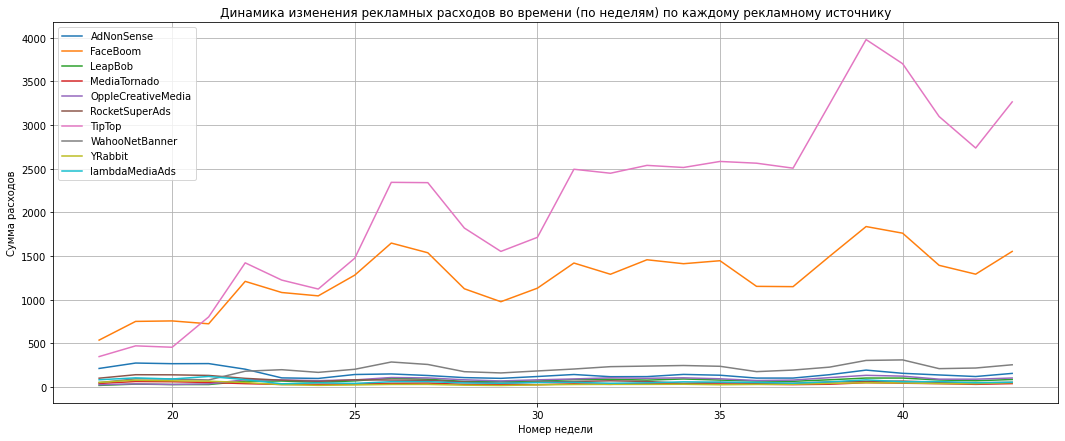

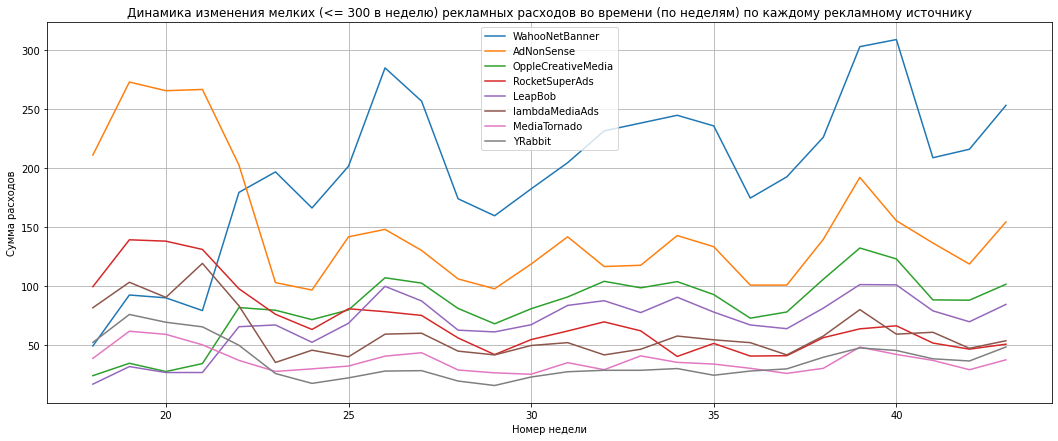

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt_month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


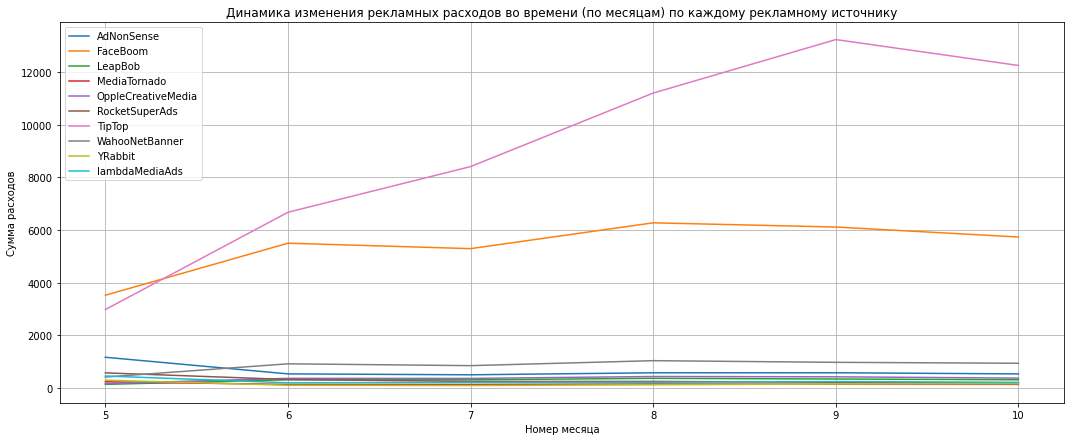

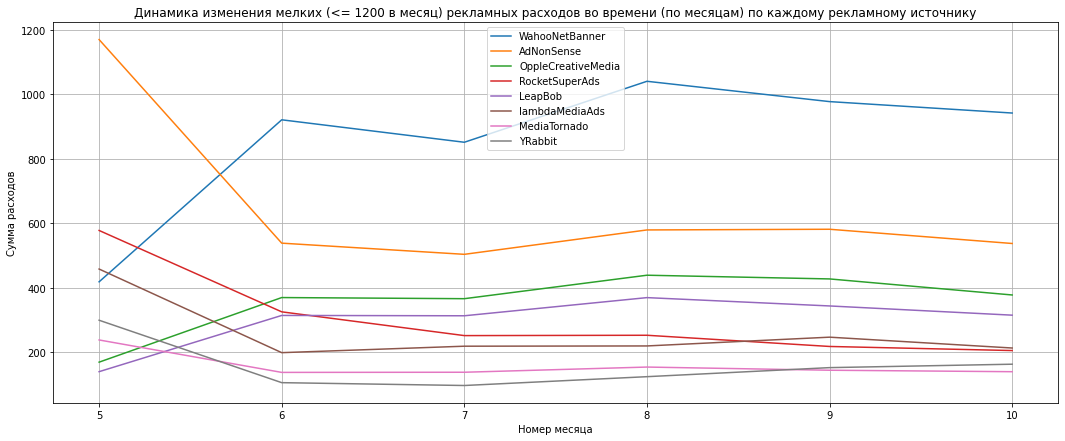

In [39]:
costs['dt_month'] = (pd.to_datetime(costs['dt'])).dt.month  
costs['dt_week'] = (pd.to_datetime(costs['dt'])).dt.isocalendar().week
print(costs['dt_month'].dtype, costs['dt_week'].dtype)
display(costs.head())
costs_chan_month = costs.pivot_table(index=['dt_week'], columns='channel', values='costs', aggfunc='sum')
display(costs_chan_month.head())
costs_chan_month.plot(grid=True, figsize=(18,7))
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Сумма расходов')
plt.title('Динамика изменения рекламных расходов во времени (по неделям) по каждому рекламному источнику')
plt.show()

costs_chan_month.loc[:, ['WahooNetBanner', 'AdNonSense', 'OppleCreativeMedia', 'RocketSuperAds', 'LeapBob', 'lambdaMediaAds', 'MediaTornado', 'YRabbit']].plot(grid=True, figsize=(18,7)) 
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Сумма расходов')
plt.title('Динамика изменения мелких (<= 300 в неделю) рекламных расходов во времени (по неделям) по каждому рекламному источнику')
plt.show()

costs_chan_month = costs.pivot_table(index=['dt_month'], columns='channel', values='costs', aggfunc='sum')
display(costs_chan_month.head())
costs_chan_month.plot(grid=True, figsize=(18,7))
plt.legend()
plt.xlabel('Номер месяца')
plt.ylabel('Сумма расходов')
plt.title('Динамика изменения рекламных расходов во времени (по месяцам) по каждому рекламному источнику')
plt.show()

costs_chan_month.loc[:, ['WahooNetBanner', 'AdNonSense', 'OppleCreativeMedia', 'RocketSuperAds', 'LeapBob', 'lambdaMediaAds', 'MediaTornado', 'YRabbit']].plot(grid=True, figsize=(18,7)) 
plt.legend()
plt.xlabel('Номер месяца')
plt.ylabel('Сумма расходов')
plt.title('Динамика изменения мелких (<= 1200 в месяц) рекламных расходов во времени (по месяцам) по каждому рекламному источнику')
plt.show()


**1. Представлены графики изменения расходов во времени (по неделям и месяцам) по каждому рекламному источнику.  
2. Отчетливо выделяются два основных рекламных источника - TipTop и FaceBoom.  
3. Расходы на рекламу через TipTop монотонно растут в течение всего периода до величины ~ 13200 в месяц (4000 в неделю), за исключением последнего месяца - октября, когда происходит снижение расходов на рекламу через этот источник.  
4. Рост расходов на рекламу через FaceBoom выражен существенно меньше и, скорее, соответствует незначительным колебаниям около определенного стационарного значения ~ 5500-6000 в месяц (~ 1500 в неделю).  
5. Расходы на остальные 8 рекламных источников проявили заметное падение в июне и далее незначительные колебания около некоторого стационарного уровня, для каждого источника своего, от 100 до 500 в месяц (от 25 до 125 в неделю). Исключение составляет только источник WahooNetBanner, через который расходы на рекламу выросли в июне примерно в 2 раза и далее колебались в районе 900 в месяц (230 в неделю).**


#### Средняя стоимость привлечения одного пользователя (CAC) из каждого рекламного источника.

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


'Средние расходы на привлечение одного пользователя по всем источникам рекламы:'

0.7

'Средние расходы на привлечение одного пользователя по источникам рекламы:'

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
YRabbit               0.22
MediaTornado          0.22
LeapBob               0.21
organic               0.00
Name: acquisition_cost, dtype: float64

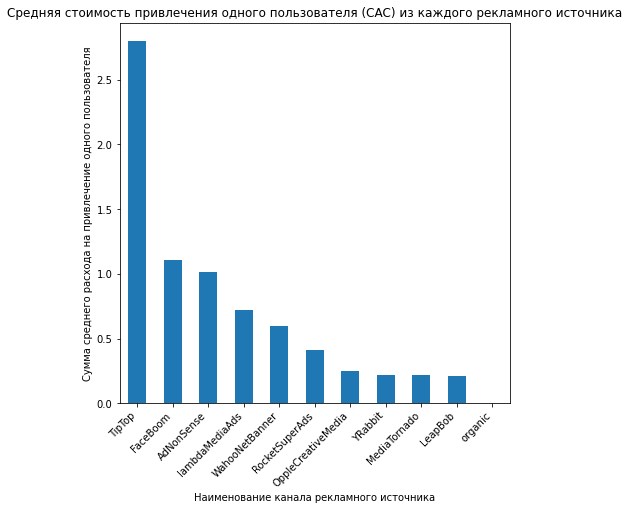

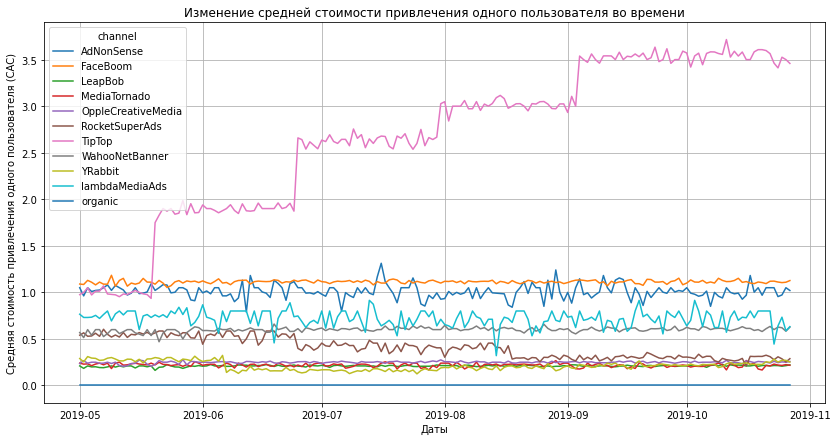

In [40]:
costs['dt'] = (pd.to_datetime(costs['dt'])).dt.date # меняем тип данных на object, иначе конфликт внутри ф-ции get_profiles_CAC, 
# где происходит объединение таблиц ad_costs и new_user по столбцу 'dt' (тип object в ф-ции); меняем через pd.to_datetime,
# поскольку, если у costs['dt'] уже был тип object, то возникнет ошибка здесь, т.к. .dt.date к типу object не применяется.

events = None
profiles_CAC = get_profiles_CAC(visits, orders, events, costs, event_names=[])
display(profiles_CAC.head())

avg_cac_tot = round(profiles_CAC['acquisition_cost'].mean(), 2)
display('Средние расходы на привлечение одного пользователя по всем источникам рекламы:', avg_cac_tot)

avg_CAC_channel = round(profiles_CAC.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False), 2)
display('Средние расходы на привлечение одного пользователя по источникам рекламы:', avg_CAC_channel)

avg_CAC_channel.plot(kind="bar", figsize=(7,7))
plt.xlabel('Наименование канала рекламного источника')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Сумма среднего расхода на привлечение одного пользователя')
plt.title('Средняя стоимость привлечения одного пользователя (CAC) из каждого рекламного источника')
plt.show()

# построим график измененния средней стоимости привлечения одного пользователя во времени для каждого источника рекламы
profiles_CAC.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')\
.plot(grid=True, figsize=(14,7))
plt.xlabel('Даты')
plt.ylabel('Средняя стоимость привлечения одного пользователя (CAC)')
plt.title('Изменение средней стоимости привлечения одного пользователя во времени')
plt.show()


**1. Канал TipTop является абсолютным лидером по средней стоимости привлечения одного пользователя, в разы более дорогой, чем другие каналы. TipTop, являясь основным источник рекламных расходов и потребляя в 1,7 раза больше средств, чем ближайший по сумме расходов канал FaceBoom, приводит в 1,45 раз меньше пользователей и в 1,9 раза меньше платящих пользователей, занимая скромное 4-ое место по доле приводимых платящих пользователей. TipTop, потребляя 52% всех рекламных ресурсов "приводит" лишь 13% от общего числа пользователей и 21% платящих пользователей.  
2. Канал FaceBoom более чем в 2,5 раза дешевле канала TipTop и, потребляя 31% всех рекламных ресурсов, "приводит" 19% от общего числа пользователей и 40% платящих пользователей.  
3. Группа из 8 малобюджетных рекламных каналов, потребляя 17% всех рекламных ресурсов, "приводит" 30% от общего числа пользователей и 26% платящих пользователей.  
4. Канал organic, не потребляя никаких ресурсов, "приводит" 38% от общего числа пользователей и 13% платящих пользователей.  
Возникают большие подозрения по рентабельности рекламных расходов.  
5. Графики изменения средней стоимости привлечения одного пользователя во времени для разных каналов демонстрируют возрастающую более чем в 3 раза стоимость привлечения через канал TipTop, понижающуюся примерно в 2 раза стоимость привлечения через канал RocketSuperAds и практически неизменную в целом стоимость привлечения через все остальные каналы.**


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

'Датафрейм LTV'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


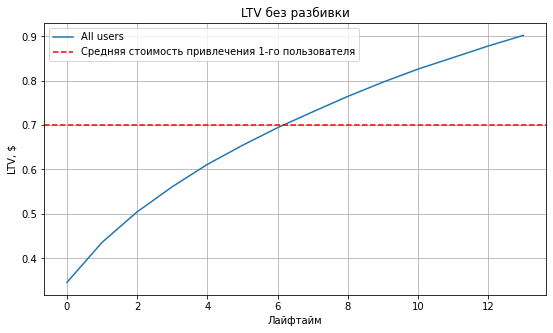

'Датафрейм ROI'

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


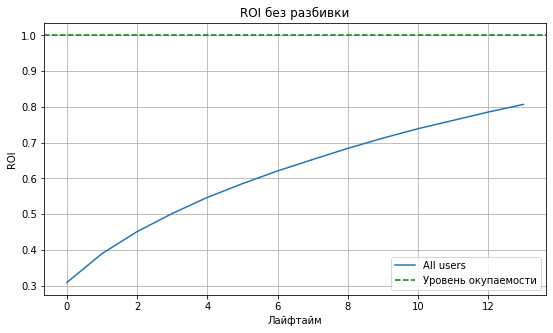

'Датафрейм LTV_HISTORY'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.294282,0.383846,0.435026,0.514359,0.565538,0.565538,0.578333,0.603923,0.680692,0.757538,0.808718,0.872692,0.885487,0.898282
2019-05-02,323,0.324427,0.618235,0.664582,0.757276,0.803622,0.880898,0.911796,0.942693,1.004489,1.035387,1.081734,1.081734,1.112632,1.158978
2019-05-03,346,0.305751,0.452861,0.568237,0.669191,0.943468,0.986734,1.001156,1.001156,1.073266,1.116532,1.130954,1.203064,1.260751,1.304017
2019-05-04,457,0.471904,0.570175,0.624770,0.679365,0.876105,0.952538,0.974376,1.028972,1.061729,1.094486,1.127243,1.181838,1.181838,1.214595
2019-05-05,438,0.232443,0.394429,0.417215,0.462785,0.496963,0.519749,0.553927,0.588105,0.599498,0.622283,0.667854,0.679247,0.713425,0.713425


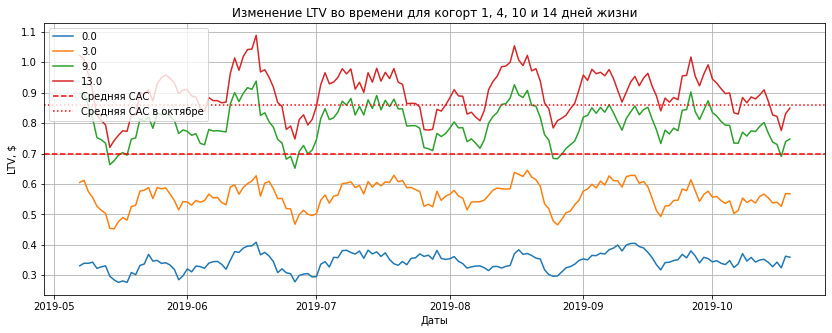

'Датафрейм ROI_HISTORY'

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,,
2019-05-01,390,0.781590,0.376517,0.491110,0.556591,0.658093,0.723575,0.723575,0.739945,0.772686,0.870907,0.969228,1.034709,1.116561,1.132931,1.149301
2019-05-02,323,0.714690,0.453941,0.865039,0.929888,1.059585,1.124434,1.232559,1.275791,1.319024,1.405489,1.448721,1.513570,1.513570,1.556802,1.621651
2019-05-03,346,0.760318,0.402136,0.595621,0.747368,0.880146,1.240886,1.297791,1.316760,1.316760,1.411601,1.468506,1.487475,1.582316,1.658190,1.715095
2019-05-04,457,0.737418,0.639941,0.773205,0.847240,0.921276,1.188071,1.291721,1.321335,1.395371,1.439792,1.484214,1.528635,1.602671,1.602671,1.647092
2019-05-05,438,0.730377,0.318251,0.540035,0.571232,0.633626,0.680421,0.711618,0.758413,0.805208,0.820806,0.852003,0.914396,0.929995,0.976790,0.976790


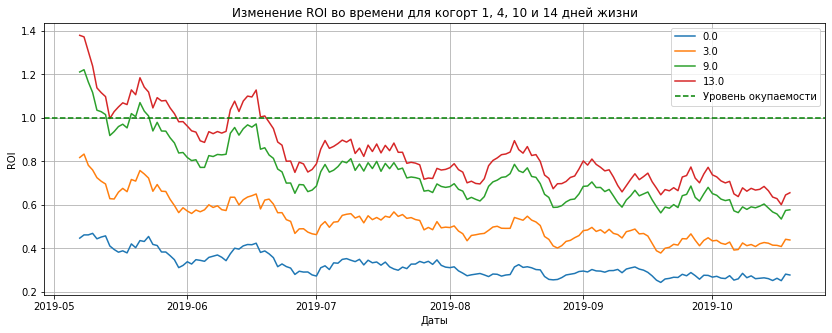

'Датафрейм САС_HISTORY'

,acquisition_cost
dt,
2019-05-01,0.781590
2019-05-02,0.714690
2019-05-03,0.760318
2019-05-04,0.737418
2019-05-05,0.730377


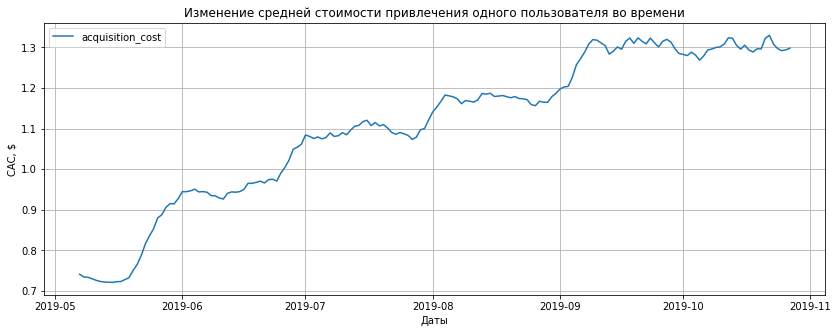

In [41]:
profiles_CAC = profiles_CAC.query('channel != "organic"')

# сформируем данные по LTV, ROI и CAC, построим графики.
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi_cac(
    profiles_CAC,
    orders, 
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
#  LTV
display('Датафрейм LTV', ltv)
ltv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(9,5))
plt.title('LTV без разбивки')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.axhline(y=avg_cac_tot, color='red', linestyle='--', label='Средняя стоимость привлечения 1-го пользователя')
plt.legend()
plt.show()

#  ROI
display('Датафрейм ROI', roi)
roi.drop(columns=['cohort_size', 'cac']).T.plot(grid=True, figsize=(9,5))
plt.title('ROI без разбивки')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='green', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

#  LTV_HISTORY
display('Датафрейм LTV_HISTORY', ltv_history.head())
window = 7
filter_data(ltv_history.drop(columns=['cohort_size'])[[0,3,9,13]], window).plot(grid=True, figsize=(14,5))
plt.title('Изменение LTV во времени для когорт 1, 4, 10 и 14 дней жизни')
plt.ylabel('LTV, $')
plt.xlabel('Даты')
plt.axhline(y=avg_cac_tot, color='red', linestyle='--', label='Средняя СAC')
plt.axhline(y=0.86, color='red', linestyle='dotted', label='Средняя CAC в октябре')
plt.legend()
plt.show()

#  ROI_HISTORY
display('Датафрейм ROI_HISTORY', roi_history.head())
window = 7
filter_data(roi_history.drop(columns=['cohort_size'])[[0,3,9,13]], window).plot(grid=True, figsize=(14,5))
plt.title('Изменение ROI во времени для когорт 1, 4, 10 и 14 дней жизни')
plt.ylabel('ROI')
plt.xlabel('Даты')
plt.axhline(y=1, color='green', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

#  CAC_HISTORY - построим график измененния средней стоимости привлечения одного пользователя во времени.
cac_history = profiles_CAC.pivot_table(index='dt', values='acquisition_cost', aggfunc='mean')
display('Датафрейм САС_HISTORY', cac_history.head())
filter_data(cac_history, window).plot(grid=True, figsize=(14,5))
plt.xlabel('Даты')
plt.ylabel('CAC, $')
plt.title('Изменение средней стоимости привлечения одного пользователя во времени')
plt.show()


**1. Из данных и графиков видно, что на дату наблюдения LTV близка, но уже не дотягивает до средней суммы затрат на маркетинг, и окупаемость упала ниже 1, т.е. затраты уже не окупаются.**  
<div class="alert alert-block alert-info"> 1.а) На 29% вырос показатель LTV на 14 день. Это объясняется тем, что канал organic приводит довольно много пользователей, но доля платящих там заметно меньше (минимальная). При исключении этого канала знаменатель (размер когорты) уменьшается существеннее, чем числитель (поступления от платящих пользователей), в итоге - рост дроби.  

1.б) Однако ROI упало. Упало на 19%. Несмотря на рост LTV, который в числителе. САС, который в знаменателе, вырос на 53% (с 0,85 до 1,3 $) и завалил ROI. САС вырос вследствие уменьшения численности когорт при неучете "органиков" при той же сумме расходов.  
</div>  

**2. Из графиков изменения рассматриваемых характеристик во времени видно, что  
а) LTV после некоторого подъёма (20-40%%) во второй половине мая - первой половине июня далее колеблется возле некоторого стационарного уровня (своего для каждого лайфтайма), явного тренда к повышению/понижению нет для всех лайфтаймов;  
б) САС резко растет в разы в периоде вторая половина мая - первая половина июня, затем более медленный, но продолжающийся устойчивый возрастающий тренд средней стоимости привлечения 1 пользователя;  
в) в соответствии с п.п.а)-б) рентабельность резко падает в периоде вторая половина мая - первая половина июня, затем более медленный, но продолжающийся устойчивый понижающийся тренд рентабельности расходов на рекламу, снизившийся ниже окупаемости в августе для всех лайфтаймов.**  
<div class="alert alert-block alert-info"> В динамике картина принципиально не меняется. Меняются только некоторые реперные точки и уровни.  

2аа) Средний уровень, около которого колеблется LTV подрастает на те же 29% (с 0,7 до 0,9 $).  

2бб) Динамика та же, а про изменение уровня САС уже сказано.  

2вв) Динамика та же, средний уровень ROI падает на те же 19%, момент пересечения нулевой рентабельности сдвигается на месяц влево.  
</div>  

**Таким образом, рост расходов на рекламу, не поддержанный соответствующим ростом продаж, а, следовательно, и LTV, привел к падению рентабельности и выходу из зоны окупаемости.**  

<div class="alert alert-block alert-info"> Итоговый вывод не меняется. Выход из зоны окупаемости происходит на месяц раньше. Дела прокрастинаторов еще хуже.   

ROI очевидно связано с расходами. С LTV это было неочевидно. На данный момент согласен, что при рассмотрении характеристик, связанных с расходами, надо очищать данные от данных, не связанных с расходами.  
    
Хорошее получилось упражнение. Спасибо.</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   ROI падает, так как растет привлечение

</div>
<div class="alert alert-block alert-info"> Хоть и зелененькое, но всё-таки спрошу. ROI падает, потому что растет привлечение пользователей, но не растет конверсия. Иначе бы растущая конверсия в покупателей и, соответственно, рост доходов поддерживал бы ROI или даже вел к росту. Я правильно понял?. </div>
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Верно, проблема в конверсии будет заметна далее

</div>


#### Анализ удержания, конверсии пользователей и динамики их изменения. 

'Датафрейм RETENTION'

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


'Датафрейм RETENTION_HISTORY'

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.011173  0.002793  0.013966  
      2019-05-02  0.010000  0.016667  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  
      2019-05-05  0.009709  0.012136  0.002427

'Датафрейм RETENTION отфильтрованный скользящим средним'

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          NaN  NaN       NaN       NaN       NaN       NaN   
      2019-05-02          NaN  NaN       NaN       NaN       NaN       NaN   
      2019-05-03          NaN  NaN       NaN       NaN       NaN       NaN   
      2019-05-04          NaN  NaN       NaN       NaN       NaN       NaN   
      2019-05-05          NaN  NaN       NaN       NaN       NaN       NaN   
...                       ...  ...       ...       ...       ...       ...   
True  2019-10-15    41.714286  1.0  0.392023  0.275097  0.264529  0.198994   
      2019-10-16    40.428571  1.0  0.385410  0.293616  0.238074  0.197671   
      2019-10-17    37.857143  1.0  0.373505  0.281711  0.239397  0.169894   
      2019-10-18    41.000000  1.0  0.343793  0.298217  0.234745  0.162691   
      2019-10-19    41.428571  1.0  0.355348  0.298217  0.230193  0.167068   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
      2019-05-02       NaN       NaN       NaN       NaN       NaN       NaN   
      2019-05-03       NaN       NaN       NaN       NaN       NaN       NaN   
      2019-05-04       NaN       NaN       NaN       NaN       NaN       NaN   
      2019-05-05       NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
True  2019-10-15  0.165047  0.135985  0.161814  0.137640  0.149893  0.107459   
      2019-10-16  0.142561  0.155827  0.147264  0.133671  0.149893  0.122010   
      2019-10-17  0.137270  0.138631  0.134037  0.141608  0.132697  0.116719   
      2019-10-18  0.170583  0.135480  0.137638  0.140257  0.127895  0.124522   
      2019-10-19  0.171984  0.137405  0.133086  0.150762  0.129646  0.129424   

                        11        12        13  
payer dt                                        
False 2019-05-01       NaN       NaN       NaN  
      2019-05-02       NaN       NaN       NaN  
      2019-05-03       NaN       NaN       NaN  
      2019-05-04       NaN       NaN       NaN  
      2019-05-05       NaN       NaN       NaN  
...                    ...       ...       ...  
True  2019-10-15  0.117412  0.097786  0.112445  
      2019-10-16  0.098893  0.099109  0.112445  
      2019-10-17  0.068470  0.100431  0.099217  
      2019-10-18  0.072071  0.096380  0.083311  
      2019-10-19  0.085902  0.107234  0.071406  

[344 rows x 15 columns]

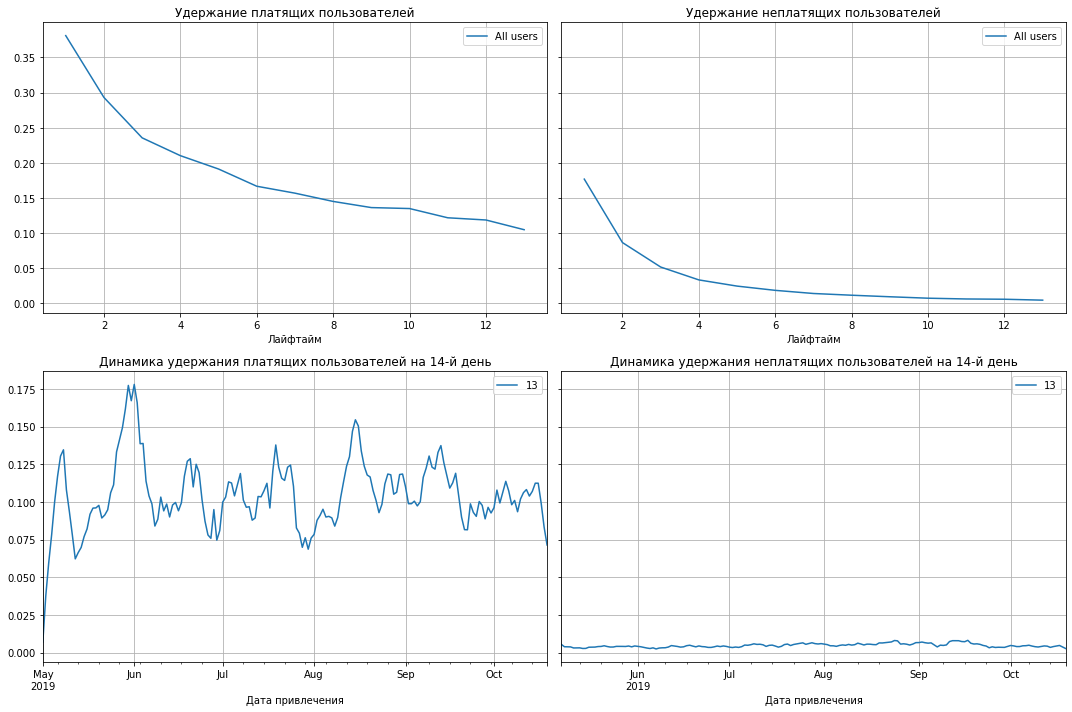

'Датафрейм CONVERSION'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


'Датафрейм CONVERSION_HISTORY'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.058974,0.066667,0.071795,0.071795,0.076923,0.076923,0.076923,0.079487,0.082051,0.082051,0.082051,0.082051,0.082051,0.082051
2019-05-02,323,0.058824,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.071207,0.071207,0.071207,0.071207
2019-05-03,346,0.057803,0.069364,0.075145,0.078035,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.086705
2019-05-04,457,0.070022,0.074398,0.076586,0.078775,0.085339,0.085339,0.087527,0.089716,0.089716,0.091904,0.091904,0.091904,0.091904,0.091904
2019-05-05,438,0.036530,0.043379,0.047945,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511


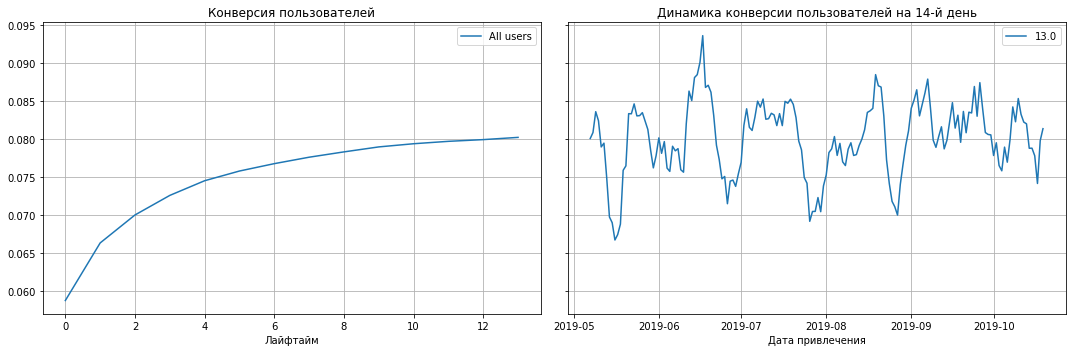

'Датафрейм RETENTION - device'

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      Mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      PC             16920  1.0  0.174704  0.087234  0.052364  0.034574   
      iPhone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
True  Android         1695  1.0  0.384661  0.298525  0.250147  0.214159   
      Mac             1597  1.0  0.365059  0.284283  0.202880  0.196619   
      PC              1208  1.0  0.421358  0.333609  0.262417  0.261589   
      iPhone          2810  1.0  0.370463  0.277224  0.233808  0.193594   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      Mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      PC       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
      iPhone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
True  Android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   
      Mac      0.172198  0.148403  0.142768  0.136506  0.132123  0.120852   
      PC       0.209437  0.225166  0.192053  0.175497  0.149834  0.163907   
      iPhone   0.185053  0.158363  0.144128  0.135943  0.132384  0.132028   

                     11        12        13  
payer device                                 
False Android  0.006530  0.005477  0.005056  
      Mac      0.006440  0.006254  0.004025  
      PC       0.005437  0.005851  0.005556  
      iPhone   0.006832  0.006319  0.004372  
True  Android  0.110914  0.128614  0.107375  
      Mac      0.115216  0.108954  0.110833  
      PC       0.148179  0.144040  0.124172  
      iPhone   0.120996  0.107473  0.091815

'Датафрейм RETENTION_HISTORY - device'

cohort_size    0         1         2         3  \
payer device  dt                                                           
False Android 2019-05-01           84  1.0  0.190476  0.083333  0.071429   
              2019-05-02           69  1.0  0.202899  0.159420  0.028986   
              2019-05-03           83  1.0  0.156627  0.072289  0.108434   
              2019-05-04           88  1.0  0.136364  0.125000  0.079545   
              2019-05-05           99  1.0  0.191919  0.101010  0.040404   

                                 4         5         6         7         8  \
payer device  dt                                                             
False Android 2019-05-01  0.011905  0.011905  0.011905  0.000000  0.011905   
              2019-05-02  0.014493  0.043478  0.043478  0.014493  0.028986   
              2019-05-03  0.012048  0.024096  0.012048  0.000000  0.024096   
              2019-05-04  0.011364  0.022727  0.011364  0.000000  0.000000   
              2019-05-05  0.010101  0.020202  0.020202  0.000000  0.010101   

                                 9        10        11        12        13  
payer device  dt                                                            
False Android 2019-05-01  0.011905  0.000000  0.000000  0.000000  0.000000  
              2019-05-02  0.000000  0.028986  0.043478  0.043478  0.000000  
              2019-05-03  0.000000  0.000000  0.000000  0.000000  0.000000  
              2019-05-04  0.011364  0.011364  0.045455  0.011364  0.022727  
              2019-05-05  0.000000  0.010101  0.000000  0.010101  0.010101

'Датафрейм RETENTION в разрезе устройств отфильтрованный скользящим средним'

cohort_size    0         1         2         3  \
payer device  dt                                                           
False Android 2019-05-01          NaN  NaN       NaN       NaN       NaN   
              2019-05-02          NaN  NaN       NaN       NaN       NaN   
              2019-05-03          NaN  NaN       NaN       NaN       NaN   
              2019-05-04          NaN  NaN       NaN       NaN       NaN   
              2019-05-05          NaN  NaN       NaN       NaN       NaN   
...                               ...  ...       ...       ...       ...   
True  iPhone  2019-10-15    15.857143  1.0  0.386735  0.295692  0.270068   
              2019-10-16    15.714286  1.0  0.368336  0.313008  0.224613   
              2019-10-17    15.428571  1.0  0.331100  0.288661  0.227478   
              2019-10-18    16.857143  1.0  0.293222  0.303813  0.224231   
              2019-10-19    15.857143  1.0  0.311027  0.285386  0.210981   

                                 4         5         6         7         8  \
payer device  dt                                                             
False Android 2019-05-01       NaN       NaN       NaN       NaN       NaN   
              2019-05-02       NaN       NaN       NaN       NaN       NaN   
              2019-05-03       NaN       NaN       NaN       NaN       NaN   
              2019-05-04       NaN       NaN       NaN       NaN       NaN   
              2019-05-05       NaN       NaN       NaN       NaN       NaN   
...                            ...       ...       ...       ...       ...   
True  iPhone  2019-10-15  0.255215  0.182313  0.130952  0.151020  0.146599   
              2019-10-16  0.257380  0.136858  0.121212  0.091497  0.148763   
              2019-10-17  0.217996  0.139007  0.121212  0.079323  0.150911   
              2019-10-18  0.189857  0.190955  0.123377  0.086899  0.153076   
              2019-10-19  0.190892  0.182466  0.129174  0.084622  0.157424   

                                 9        10        11        12        13  
payer device  dt                                                            
False Android 2019-05-01       NaN       NaN       NaN       NaN       NaN  
              2019-05-02       NaN       NaN       NaN       NaN       NaN  
              2019-05-03       NaN       NaN       NaN       NaN       NaN  
              2019-05-04       NaN       NaN       NaN       NaN       NaN  
              2019-05-05       NaN       NaN       NaN       NaN       NaN  
...                            ...       ...       ...       ...       ...  
True  iPhone  2019-10-15  0.162132  0.116893  0.097959  0.117687  0.086621  
              2019-10-16  0.152391  0.156937  0.087137  0.105782  0.087704  
              2019-10-17  0.147737  0.144763  0.046320  0.093609  0.074098  
              2019-10-18  0.149901  0.158833  0.053896  0.081704  0.068687  
              2019-10-19  0.157148  0.169392  0.072530  0.097025  0.054401  

[1376 rows x 15 columns]

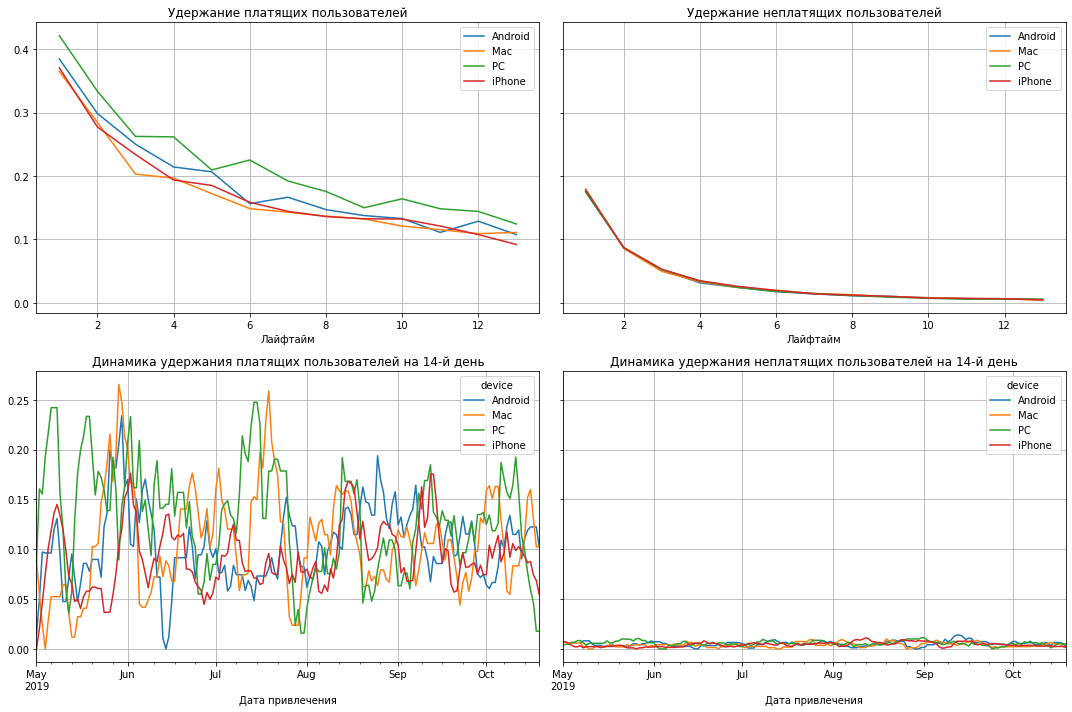

'Датафрейм CONVERSION - device'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.058309,0.066141,0.070058,0.072378,0.074506,0.075714,0.076923,0.077552,0.078083,0.078809,0.079147,0.079437,0.079776,0.079921
Mac,17747,0.064349,0.072970,0.076802,0.079281,0.080971,0.082267,0.083225,0.084014,0.084747,0.085648,0.086268,0.086493,0.086606,0.087057
PC,18128,0.046613,0.053067,0.055991,0.058142,0.060293,0.061562,0.062665,0.063438,0.064100,0.064431,0.064707,0.064872,0.065093,0.065368
iPhone,32086,0.062800,0.070249,0.074113,0.077136,0.078944,0.080253,0.081001,0.082061,0.082871,0.083526,0.083962,0.084429,0.084648,0.084959


'Датафрейм CONVERSION_HISTORY - device'

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01           95  0.073684  0.084211  0.084211  0.084211   
        2019-05-02           73  0.027397  0.041096  0.041096  0.041096   
        2019-05-03           89  0.044944  0.056180  0.067416  0.067416   
        2019-05-04          101  0.099010  0.099010  0.108911  0.108911   
        2019-05-05          103  0.038835  0.038835  0.038835  0.038835   

                         4.0       5.0       6.0       7.0       8.0  \
device  dt                                                             
Android 2019-05-01  0.094737  0.094737  0.094737  0.105263  0.115789   
        2019-05-02  0.041096  0.041096  0.041096  0.041096  0.041096   
        2019-05-03  0.067416  0.067416  0.067416  0.067416  0.067416   
        2019-05-04  0.118812  0.118812  0.128713  0.128713  0.128713   
        2019-05-05  0.038835  0.038835  0.038835  0.038835  0.038835   

                         9.0      10.0      11.0      12.0      13.0  
device  dt                                                            
Android 2019-05-01  0.115789  0.115789  0.115789  0.115789  0.115789  
        2019-05-02  0.041096  0.054795  0.054795  0.054795  0.054795  
        2019-05-03  0.067416  0.067416  0.067416  0.067416  0.067416  
        2019-05-04  0.128713  0.128713  0.128713  0.128713  0.128713  
        2019-05-05  0.038835  0.038835  0.038835  0.038835  0.038835

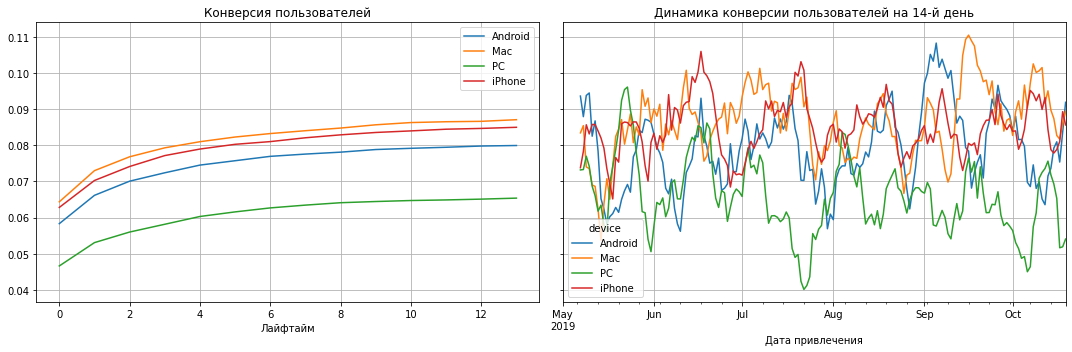

'Датафрейм RETENTION - region'

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France                9993  1.0  0.173021  0.091164  0.052036  0.033724   
      Germany               8563  1.0  0.176690  0.084900  0.056172  0.035034   
      UK                   10002  1.0  0.179064  0.088582  0.051390  0.031994   
      United States        52776  1.0  0.177221  0.085626  0.051160  0.033500   
True  France                 523  1.0  0.474187  0.386233  0.323136  0.307839   
      Germany                467  1.0  0.483940  0.402570  0.314775  0.327623   
      UK                     534  1.0  0.483146  0.421348  0.327715  0.299625   
      United States         5786  1.0  0.354822  0.263913  0.212755  0.183719   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022616  0.018213  0.014610  0.012108  0.010607   
      Germany        0.025225  0.019503  0.014014  0.010510  0.009926   
      UK             0.024595  0.017696  0.015897  0.011598  0.008498   
      United States  0.025030  0.018777  0.013813  0.011880  0.009474   
True  France         0.296367  0.246654  0.239006  0.223709  0.204589   
      Germany        0.284797  0.244111  0.220557  0.239829  0.211991   
      UK             0.277154  0.271536  0.247191  0.198502  0.155431   
      United States  0.166263  0.143623  0.136018  0.125475  0.122364   

                           10        11        12        13  
payer region                                                 
False France         0.007805  0.006304  0.005304  0.005504  
      Germany        0.007007  0.005722  0.006890  0.006540  
      UK             0.007299  0.006899  0.006399  0.004499  
      United States  0.007541  0.006423  0.005931  0.004301  
True  France         0.210325  0.168260  0.189293  0.173996  
      Germany        0.233405  0.173448  0.160600  0.134904  
      UK             0.168539  0.192884  0.183521  0.177903  
      United States  0.117179  0.106982  0.103007  0.089526

'Датафрейм RETENTION_HISTORY - region'

cohort_size    0         1         2         3  \
payer region dt                                                           
False France 2019-05-01           51  1.0  0.137255  0.039216  0.117647   
             2019-05-02           26  1.0  0.230769  0.076923  0.038462   
             2019-05-03           40  1.0  0.175000  0.075000  0.050000   
             2019-05-04           36  1.0  0.111111  0.027778  0.027778   
             2019-05-05           41  1.0  0.243902  0.097561  0.048780   

                                4    5         6         7        8         9  \
payer region dt                                                                 
False France 2019-05-01  0.019608  0.0  0.019608  0.019608  0.00000  0.019608   
             2019-05-02  0.038462  0.0  0.038462  0.000000  0.00000  0.000000   
             2019-05-03  0.000000  0.0  0.050000  0.000000  0.02500  0.000000   
             2019-05-04  0.055556  0.0  0.000000  0.000000  0.00000  0.055556   
             2019-05-05  0.024390  0.0  0.000000  0.000000  0.02439  0.000000   

                              10        11   12        13  
payer region dt                                            
False France 2019-05-01  0.00000  0.000000  0.0  0.019608  
             2019-05-02  0.00000  0.076923  0.0  0.038462  
             2019-05-03  0.00000  0.000000  0.0  0.000000  
             2019-05-04  0.00000  0.000000  0.0  0.000000  
             2019-05-05  0.02439  0.000000  0.0  0.000000

'Датафрейм RETENTION в разрезе стран отфильтрованный скользящим средним'

cohort_size    0         1         2  \
payer region        dt                                                 
False France        2019-05-01          NaN  NaN       NaN       NaN   
                    2019-05-02          NaN  NaN       NaN       NaN   
                    2019-05-03          NaN  NaN       NaN       NaN   
                    2019-05-04          NaN  NaN       NaN       NaN   
                    2019-05-05          NaN  NaN       NaN       NaN   
...                                     ...  ...       ...       ...   
True  United States 2019-10-15    39.357143  1.0  0.355710  0.227172   
                    2019-10-16    37.714286  1.0  0.355077  0.241736   
                    2019-10-17    36.500000  1.0  0.341007  0.239052   
                    2019-10-18    36.428571  1.0  0.339701  0.249941   
                    2019-10-19    35.642857  1.0  0.344642  0.254176   

                                       3         4         5         6  \
payer region        dt                                                   
False France        2019-05-01       NaN       NaN       NaN       NaN   
                    2019-05-02       NaN       NaN       NaN       NaN   
                    2019-05-03       NaN       NaN       NaN       NaN   
                    2019-05-04       NaN       NaN       NaN       NaN   
                    2019-05-05       NaN       NaN       NaN       NaN   
...                                  ...       ...       ...       ...   
True  United States 2019-10-15  0.224464  0.180279  0.133689  0.124075   
                    2019-10-16  0.218068  0.169514  0.134956  0.128318   
                    2019-10-17  0.219626  0.161722  0.127164  0.121911   
                    2019-10-18  0.218146  0.165511  0.141580  0.120343   
                    2019-10-19  0.225365  0.163586  0.141997  0.117006   

                                       7         8         9        10  \
payer region        dt                                                   
False France        2019-05-01       NaN       NaN       NaN       NaN   
                    2019-05-02       NaN       NaN       NaN       NaN   
                    2019-05-03       NaN       NaN       NaN       NaN   
                    2019-05-04       NaN       NaN       NaN       NaN   
                    2019-05-05       NaN       NaN       NaN       NaN   
...                                  ...       ...       ...       ...   
True  United States 2019-10-15  0.143641  0.098473  0.128154  0.110855   
                    2019-10-16  0.143451  0.101323  0.124988  0.118137   
                    2019-10-17  0.142109  0.103574  0.126503  0.106752   
                    2019-10-18  0.133528  0.110804  0.126677  0.110454   
                    2019-10-19  0.136352  0.113916  0.130142  0.107117   

                                      11        12        13  
payer region        dt                                        
False France        2019-05-01       NaN       NaN       NaN  
                    2019-05-02       NaN       NaN       NaN  
                    2019-05-03       NaN       NaN       NaN  
                    2019-05-04       NaN       NaN       NaN  
                    2019-05-05       NaN       NaN       NaN  
...                                  ...       ...       ...  
True  United States 2019-10-15  0.102031  0.094142  0.077493  
                    2019-10-16  0.095889  0.094079  0.072807  
                    2019-10-17  0.089482  0.088451  0.071379  
                    2019-10-18  0.093184  0.086883  0.066196  
                    2019-10-19  0.097644  0.089290  0.062153  

[1342 rows x 15 columns]

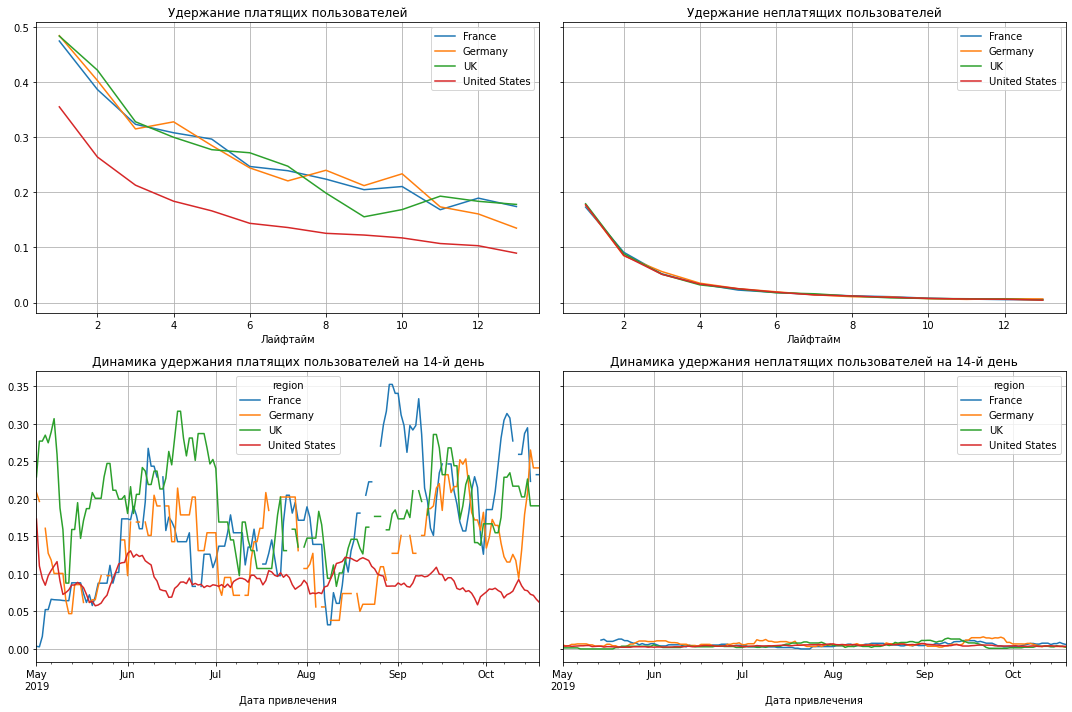

'Датафрейм CONVERSION - region'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.033092,0.037467,0.040985,0.042697,0.044313,0.045359,0.046120,0.046405,0.046976,0.047547,0.047642,0.048117,0.048307,0.048402
Germany,9030,0.032337,0.038760,0.041528,0.043854,0.045072,0.046512,0.047398,0.048283,0.049059,0.049612,0.049723,0.049834,0.049945,0.050498
UK,10536,0.034074,0.039104,0.042426,0.044039,0.045368,0.046412,0.047551,0.048121,0.048405,0.048595,0.048975,0.049070,0.049165,0.049165
United States,58562,0.071873,0.080650,0.084560,0.087497,0.089700,0.091032,0.092022,0.093013,0.093798,0.094566,0.095096,0.095454,0.095728,0.096069


'Датафрейм CONVERSION_HISTORY - region'

cohort_size       0.0       1.0       2.0       3.0  \
region dt                                                                
France 2019-05-01           52  0.019231  0.019231  0.019231  0.019231   
       2019-05-02           27  0.037037  0.037037  0.037037  0.037037   
       2019-05-03           45  0.088889  0.088889  0.088889  0.088889   
       2019-05-04           38  0.052632  0.052632  0.052632  0.052632   
       2019-05-05           44  0.045455  0.045455  0.045455  0.045455   

                        4.0       5.0       6.0       7.0       8.0       9.0  \
region dt                                                                       
France 2019-05-01  0.019231  0.019231  0.019231  0.019231  0.019231  0.019231   
       2019-05-02  0.037037  0.037037  0.037037  0.037037  0.037037  0.037037   
       2019-05-03  0.088889  0.088889  0.088889  0.088889  0.088889  0.088889   
       2019-05-04  0.052632  0.052632  0.052632  0.052632  0.052632  0.052632   
       2019-05-05  0.045455  0.045455  0.045455  0.045455  0.045455  0.045455   

                       10.0      11.0      12.0      13.0  
region dt                                                  
France 2019-05-01  0.019231  0.019231  0.019231  0.019231  
       2019-05-02  0.037037  0.037037  0.037037  0.037037  
       2019-05-03  0.088889  0.088889  0.088889  0.088889  
       2019-05-04  0.052632  0.052632  0.052632  0.052632  
       2019-05-05  0.045455  0.045455  0.045455  0.045455

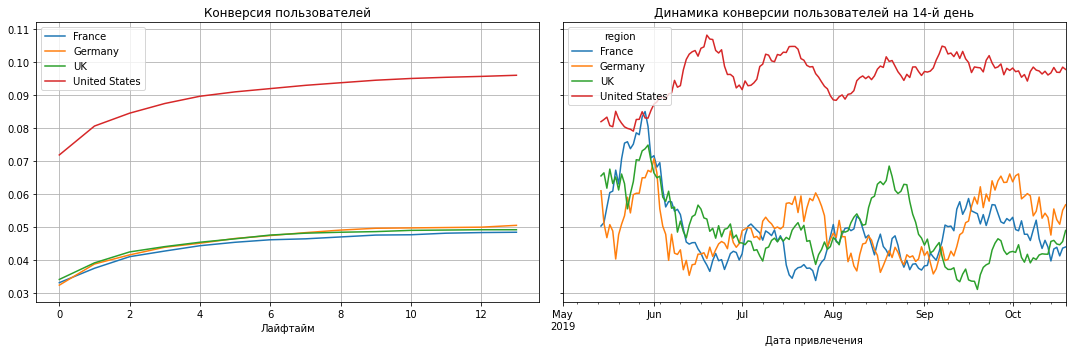

In [42]:
profiles = get_profiles(visits, orders)
profiles = profiles.query('channel != "organic"')

# RETENTION
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
window = 7
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

display('Датафрейм RETENTION', retention)
display('Датафрейм RETENTION_HISTORY', retention_history.head())

filtered_retention_history = filter_data(retention_history, window)
display('Датафрейм RETENTION отфильтрованный скользящим средним', filtered_retention_history)

plot_retention(retention, filtered_retention_history, horizon_days)

# CONVERSION
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[])

display('Датафрейм CONVERSION', conversion)
display('Датафрейм CONVERSION_HISTORY', conversion_history.head())

plot_conversion(conversion, conversion_history, horizon_days, window) 

# RETENTION - device
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
window = 7
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

display('Датафрейм RETENTION - device', retention)
display('Датафрейм RETENTION_HISTORY - device', retention_history.head())

filtered_retention_history = filter_data(retention_history, window)
display('Датафрейм RETENTION в разрезе устройств отфильтрованный скользящим средним', filtered_retention_history)

plot_retention(retention, filtered_retention_history, horizon_days)

# CONVERSION - device
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])

display('Датафрейм CONVERSION - device', conversion)
display('Датафрейм CONVERSION_HISTORY - device', conversion_history.head())

plot_conversion(conversion, conversion_history, horizon_days, window) 

# RETENTION - region
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
window = 14
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

display('Датафрейм RETENTION - region', retention)
display('Датафрейм RETENTION_HISTORY - region', retention_history.head())

filtered_retention_history = filter_data(retention_history, window)
display('Датафрейм RETENTION в разрезе стран отфильтрованный скользящим средним', filtered_retention_history)

plot_retention(retention, filtered_retention_history, horizon_days)

# CONVERSION - region
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])

display('Датафрейм CONVERSION - region', conversion)
display('Датафрейм CONVERSION_HISTORY - region', conversion_history.head())

plot_conversion(conversion, conversion_history, horizon_days, window) 



**1. Подсчитано и представлено удержание платящих и неплатящих пользователей. Явных аномалий не видно. Удержание платящих пользователей в диапазоне от 40% в первый день до 12,5% на 14 день, удержание неплатящих в диапазоне от 18% до 0,5% в те же дни. Удержание имеет колебания, но средний уровень достаточно стабилен.**  
2. Подсчитана и представлена конверсия пользователей. Явных аномалий не видно. Конверсия пользователей достигает 5,8% на 14 день. Конверсия выросла с 4,5% до 5,8% в среднем за май и далее колебалась в окрестности этого уровня. Средний уровень достаточно стабилен.  
<div class="alert alert-block alert-info"> При исключении из рассмотрения "органиков"  

1. удержание несколько улучшается, но незначительно - из диапазона (0,40-0,12) в диапазон (0,38-0,10), что говорит о том, что удержание "органиков" и не"органиков" не сильно отличаются, хотя у не"органиков" немного лучше показатели;  

2. конверсия заметно прибавляет, от диапазона (0,041-0,058) до (0,0575-0,08), что и неудивительно, поскольку доля платящих пользователей у "органиков" минимальная, т.е. конверсия похуже.</div> 
**ХАРАКТЕРИСТИКИ УДЕРЖАНИЯ И КОНВЕРСИИ С РАЗБИВКОЙ ПО УСТРОЙСТВАМ.  
3. Характеристики удержания платящих пользователей достаточно близки для всех устройств (40-12%%), за исключением устройства РС, для которого удержание (44-17%) выше примерно ~ 15-20%. Удержание неплатящих пользователей практически сливается в одну линию для всех устройств. Динамика удержания для всех устройств в среднем достаточно стабильны. В периоде май - август у РС получше, но с августа характеристика удержания для  всех устройств в среднем одинаковы и стабильны, в связи с чем, возможно в следующем аналогичном периоде преимущество в характеристике удержания у РС пропадет.  
4. Характеристики конверсии заметно отличаются. Лидер удержания РС стал явным аутсайдером в конверсии, с показателями примерно на 20-30% более низкими (3,3 - 4,8%%), чем у Мас и iPhone (4,4 - 6,1%%). Конверсия Android занимает промежуточное положение с показателями 4-5,7%. Динамика конверсии для устройств носит колебательный характер, падающих/растущих трендов не проявляет. Средние значения примерно соответствуют отмеченным ваше уровням конверсии. Различия в конверсии между устройствами имеют тенденцию к сохранению.  
ХАРАКТЕРИСТИКИ УДЕРЖАНИЯ И КОНВЕРСИИ С РАЗБИВКОЙ ПО СТРАНАМ.  
5. Характеристики удержания платящих пользователей достаточно близки для всех стран (50-17%%), за исключением США, для которых удержание (38-10%) ниже примерно ~ 30-40%. Удержание неплатящих пользователей практически сливается в одну линию для всех стран. Динамика удержания для всех стран в среднем достаточно стабильны. Явно выраженные тренды в динамике отсутствуют.  
6. Характеристики конверсии заметно отличаются. Аутсайдер удержания США стали явным лидером в конверсии, с показателями примерно на 30-40% более высокими (4,9 - 6,5%%), чем у других стран (2,5 - 4%%). Динамика конверсии для стран носит колебательный характер, падающих/растущих трендов не проявляет. Средние значения примерно соответствуют отмеченным ваше уровням конверсии. Различия в конверсии между устройствами имеют тенденцию к сохранению.**  
<div class="alert alert-block alert-info"> При исключении из рассмотрения "органиков"  

1. удержание несколько улучшается, но незначительно - из диапазона (0,40-0,12) в диапазон (0,38-0,10), что говорит о том, что удержание "органиков" и не"органиков" не сильно отличаются, хотя у не"органиков" немного лучше показатели;  

2. конверсия заметно прибавляет, от диапазона (0,041-0,058) до (0,0575-0,08), что и неудивительно, поскольку доля платящих пользователей у "органиков" минимальная, т.е. конверсия хуже.</div> 

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Согласен

</div>


####  Анализ окупаемости рекламы с разбивкой по устройствам. Графики LTV и ROI и графики динамики LTV, CAC и ROI.

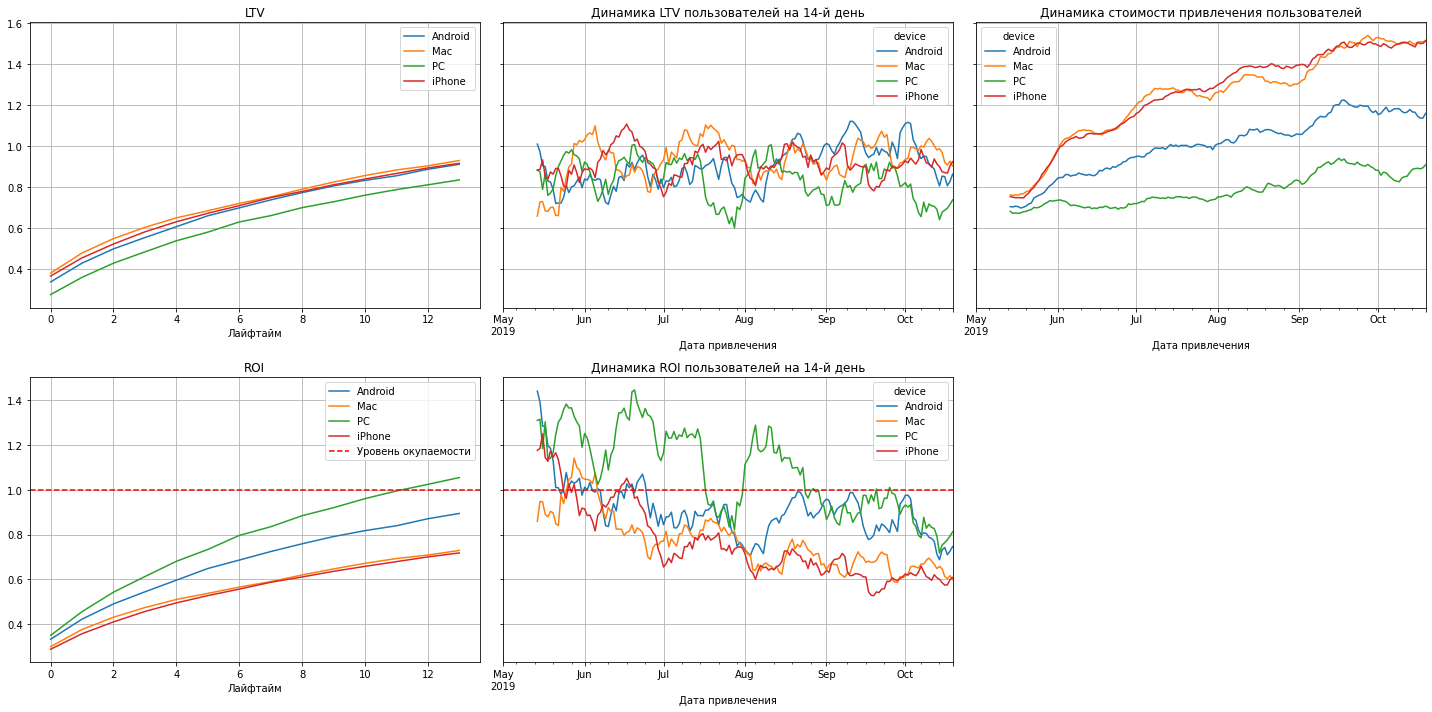

payer                  non_payer  payer
device  region                         
Android France              3165    148
        Germany             2705    144
        UK                  3070    173
        United States      11119   1317
Mac     France              1094     69
        Germany              972     48
        UK                  1037     49
        United States      13917   1507
PC      France              4163    221
        Germany             3597    200
        UK                  4308    243
        United States       5791    630
iPhone  France              2082    116
        Germany             1764     98
        UK                  2170    104
        United States      24894   2654

payer                       non_payer  payer
device  channel                             
Android AdNonSense                991    118
        FaceBoom                 5091    784
        LeapBob                  2493     87
        MediaTornado              849     30
        OppleCreativeMedia       2472     54
        RocketSuperAds            874     54
        TipTop                   3480    409
        WahooNetBanner           2428    149
        YRabbit                   825     40
        lambdaMediaAds            556     57
Mac     AdNonSense                371     39
        FaceBoom                 6379    886
        LeapBob                   853     27
        MediaTornado             1061     44
        OppleCreativeMedia        848     34
        RocketSuperAds           1040     97
        TipTop                   4381    439
        WahooNetBanner            816     40
        YRabbit                  1056     41
        lambdaMediaAds            215     26
PC      AdNonSense               1371    192
        FaceBoom                 2651    357
        LeapBob                  3295    107
        MediaTornado              436     17
        OppleCreativeMedia       3403     93
        RocketSuperAds            433     33
        TipTop                   1809    203
        WahooNetBanner           3224    185
        YRabbit                   462     20
        lambdaMediaAds            775     87
iPhone  AdNonSense                707     91
        FaceBoom                11466   1530
        LeapBob                  1650     41
        MediaTornado             1862     65
        OppleCreativeMedia       1649     52
        RocketSuperAds           1749    168
        TipTop                   8013    827
        WahooNetBanner           1632     79
        YRabbit                  1804     64
        lambdaMediaAds            378     55

'Средние расходы на привлечение одного пользователя по устройствам:'

device
iPhone     1.29
Mac        1.29
Android    1.03
PC         0.80
Name: acquisition_cost, dtype: float64

In [43]:
costs['dt'] = (pd.to_datetime(costs['dt'])).dt.date # меняем тип данных на object, иначе конфликт внутри ф-ции get_profiles_CAC, 
# где происходит объединение таблиц ad_costs и new_user по столбцу 'dt' (тип object в ф-ции); меняем через pd.to_datetime,
# поскольку, если у costs['dt'] уже был тип object, то возникнет ошибка здесь, т.к. .dt.date к типу object не применяется.

profiles_CAC = get_profiles_CAC(visits, orders, events, costs, event_names=[])
profiles_CAC = profiles_CAC.query('channel != "organic"')

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
window = 14
# считаем ltv, ltv_history, roi, roi_history
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi_cac(
    profiles_CAC,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window) 

display(profiles.pivot_table(index=['device','region'], columns='payer', values='user_id', aggfunc='nunique')\
        .rename(columns={False:'non_payer', True:'payer'}))

display(profiles.pivot_table(index=['device','channel'], columns='payer', values='user_id', aggfunc='nunique')\
        .rename(columns={False:'non_payer', True:'payer'}))

avg_CAC_device = round(profiles_CAC.groupby('device')['acquisition_cost'].mean().sort_values(ascending=False), 2)
display('Средние расходы на привлечение одного пользователя по устройствам:', avg_CAC_device)

**1. LTV для всех устройств очень близки за исключением устройств РС, для которых LTV ниже на 0,05$, что дает от ~ 7% (на 14 день) до 25% на 1 день (влияние базы на относительные характеристики). Динамика LTV для всех устройств достаточно близки и довольно стабильны. Более низкие характеристики LTV для РС связаны, как видно из раздела 5.2, с более слабой конверсией, несмотря на более хорошие характеристики удержания.  
2. Картина динамики стоимости привлечения пользователей существенно иная. Для всех устройств динамика имеет возрастающий тренд, при этом САС для устройств Мас и iPhone очень близки и примерно в 1.6 раза выше, чем для РС, и в 1,25 раза выше, чем для Android.  
3. Естественным следствием п.п.1-2 - относительно равных и стабильных характеристик LTV и существенно различных стоимостей САС - является различие в рентабельности. Если РС начинает окупаться с 7-го дня, то Android только с 11-го, а Мас и iPhone не окупаются вовсе, убыточны. Динамика ROI нисходящая для всех устройств, но особенно плоха для Мас и iPhone, которые вышли из зоны окупаемости еще в конце июня. Динамика ROI для вроде бы еще окупающегося Android демонстрирует, что это устройство с середины сентября уже вышло из зоны окупаемости в убыточность, а лидер - РС находится уже на грани окупаемости.**  
<div class="alert alert-block alert-info"> При исключении из рассмотрения "органиков" картина та же, что описана в разделе 6.1 

1. LTV несколько повышается;  

2. САС существенно увеличивается;

3. ROI заметно снижается, выход из зоны окупаемости смещается на месяц влево, теперь и РС уже убыточно с сентября.</div> 
    
**Однако причиной этих различий может быть не столько различия между устройствами, сколько влияние иного фактора, так опосредовано проявляющегося через устройства.**

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   При этом стоит помнить, что основная масса пользователей США используют технику apple

</div>


#### Анализ окупаемости рекламы с разбивкой по странам. Графики LTV и ROI и графики динамики LTV, CAC и ROI.

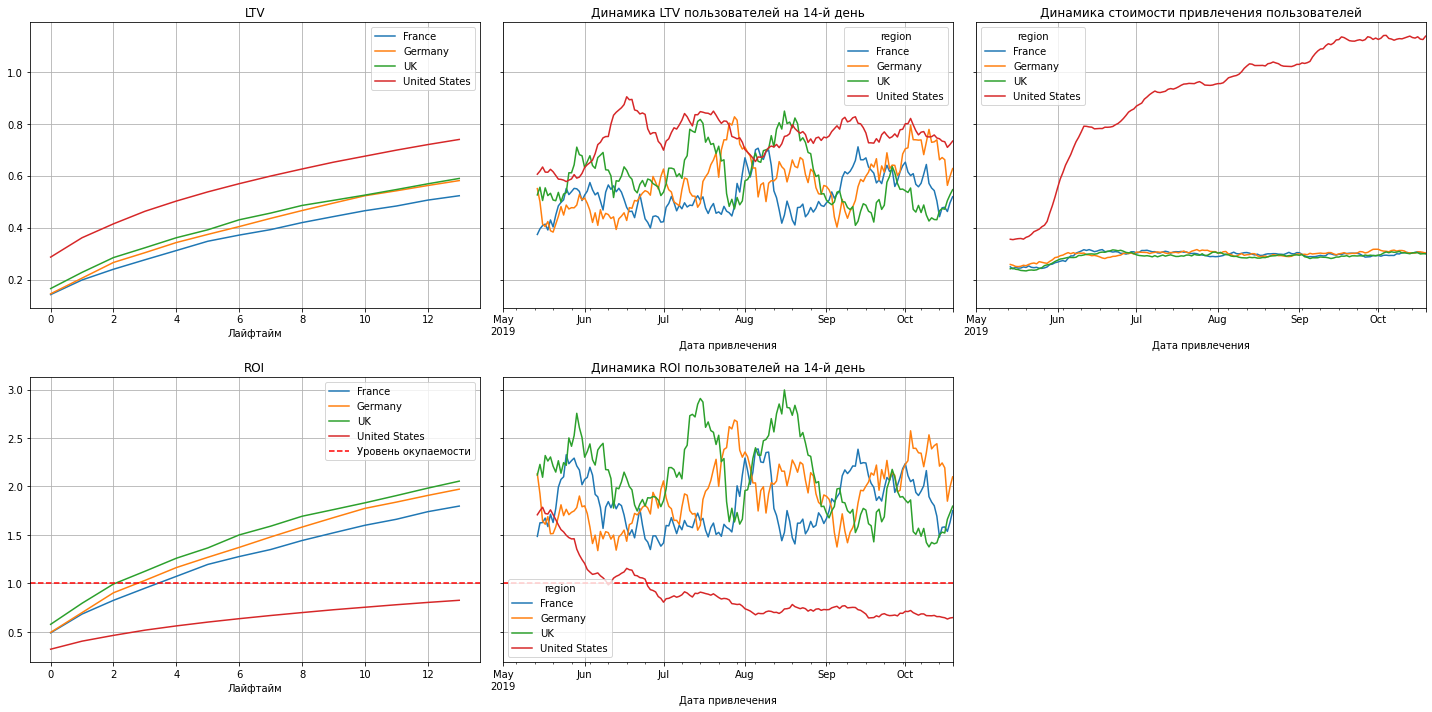

In [44]:
costs['dt'] = (pd.to_datetime(costs['dt'])).dt.date # меняем тип данных на object, иначе конфликт внутри ф-ции get_profiles_CAC, 
# где происходит объединение таблиц ad_costs и new_user по столбцу 'dt' (тип object в ф-ции); меняем через pd.to_datetime,
# поскольку, если у costs['dt'] уже был тип object, то возникнет ошибка здесь, т.к. .dt.date к типу object не применяется.

profiles_CAC = get_profiles_CAC(visits, orders, events, costs, event_names=[])
#profiles_CAC = profiles_CAC.query('channel != "organic"')

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
window = 14
# считаем ltv, ltv_history, roi, roi_history
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi_cac(
    profiles_CAC,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window) 


**1. LTV для всех стран очень близки за исключением США, для которых LTV выше на 0,12-0,20$ (на 1-14 день). Динамика LTV для всех устройств достаточно стабильны и средние уровни соответствуют примерно вышеуказанным. Более высокие характеристики LTV для США связаны, как видно из раздела 5.2, с заметно лучшейй конверсией, несмотря на более слабые характеристики удержания.  
2. Картина динамики стоимости привлечения пользователей существенно иная. Для всех стран динамика стабильна, кроме США, для которых динамика имеет возрастающий тренд, при этом САС для США примерно в 3,5 раза выше, чем для других стран.  
3. Естественным следствием п.2 является различие в рентабельности. Если все страны окупаются на 2-3 день, то США не окупаются вовсе, убыточны. Динамика ROI в среднем стабильная для всех устройств, кроме США, для которых динамика ROI имеет явно ниспадающий характер и на конец июня вышла изоны окупаемости в зону убыточности.**
<div class="alert alert-block alert-info"> При исключении из рассмотрения "органиков" картина та же, что описана в разделе 6.1, поскольку смотрим одни и те же суммы, только в разной разбивке.

1. LTV несколько повышается;  

2. САС существенно увеличивается;

3. ROI заметно снижается, выход из зоны окупаемости смещается на месяц влево.</div> 
    
**Однако причиной этих различий может быть, как и в п.5.3, не столько различия между странами, сколько влияние иного фактора, так опосредовано проявляющегося через устройства.**

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, по США явно наблюдаются проблемы

</div>


#### Анализ окупаемости рекламы с разбивкой по рекламным каналам. Графики LTV и ROI и графики динамики LTV, CAC и ROI.

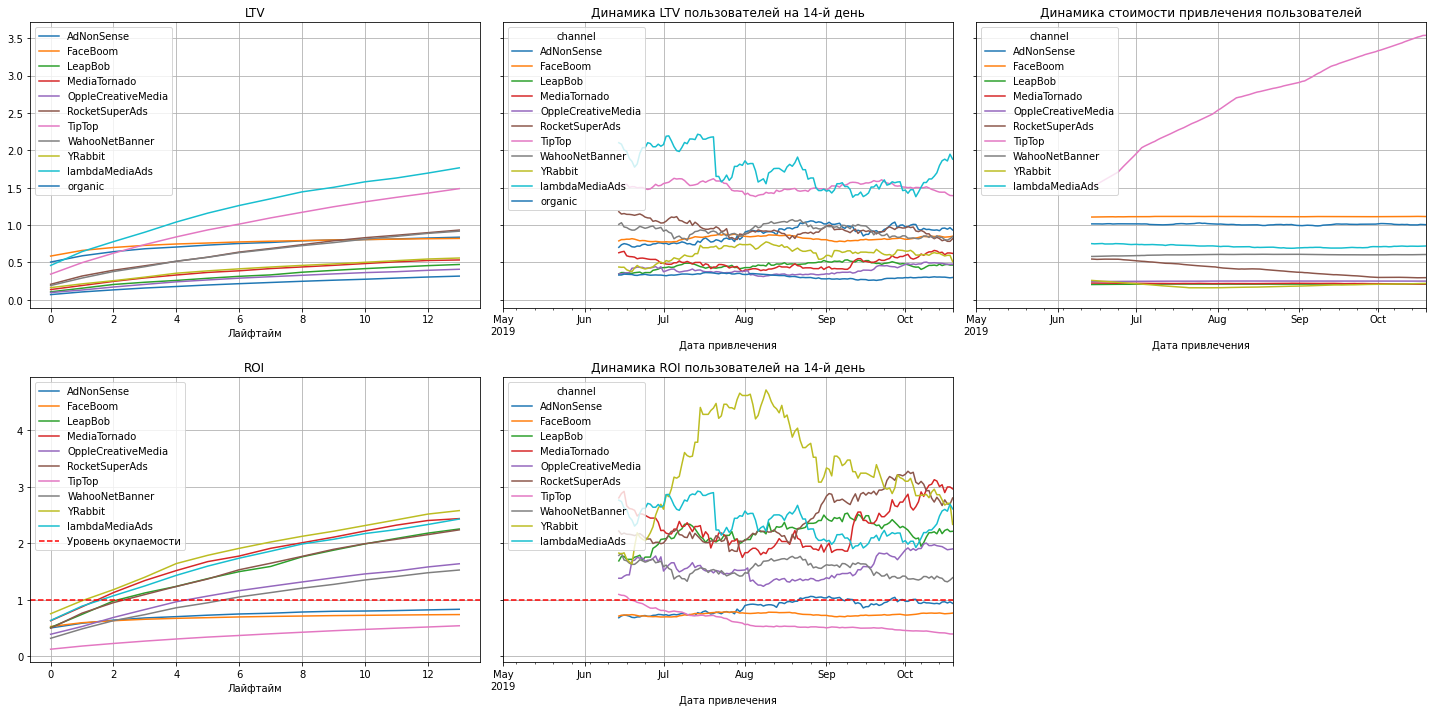

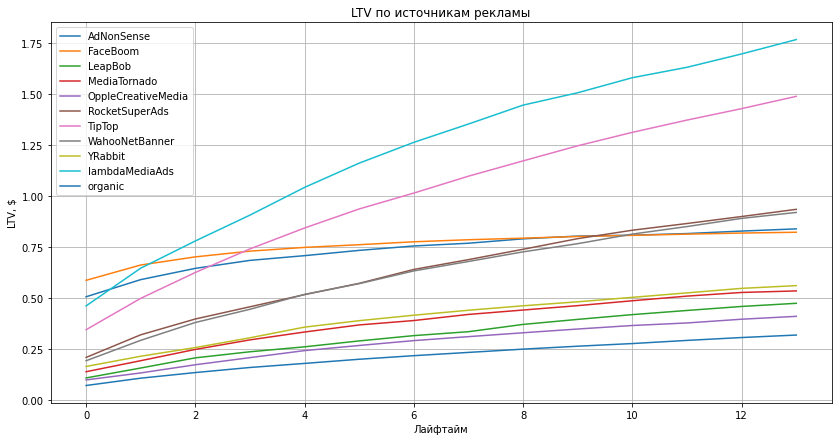

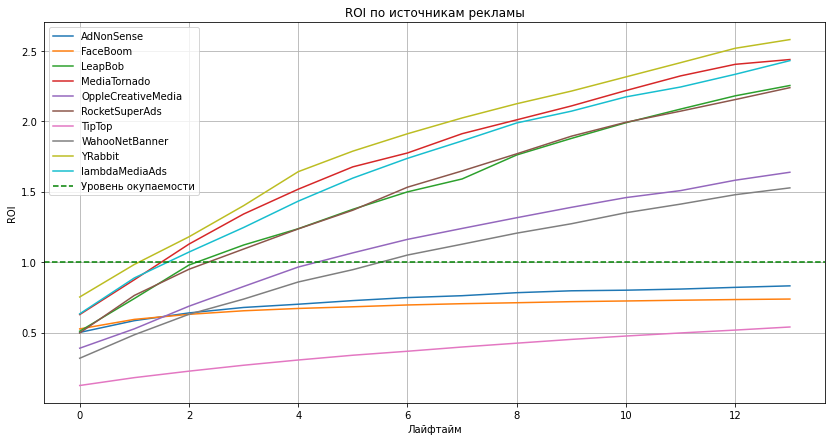

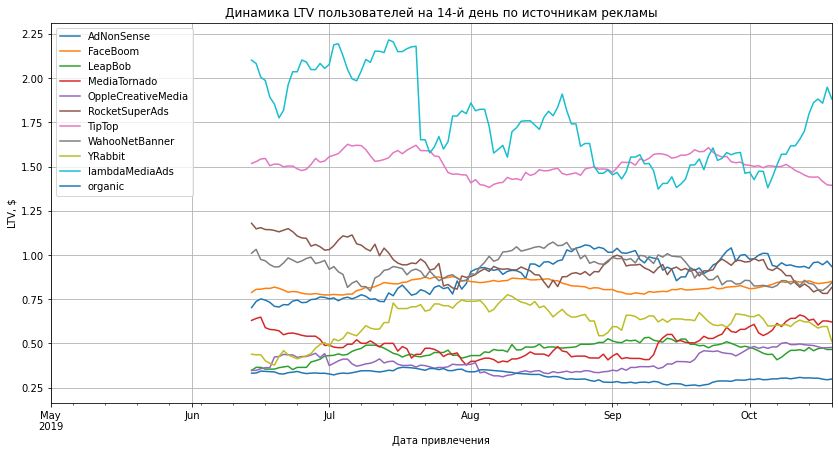

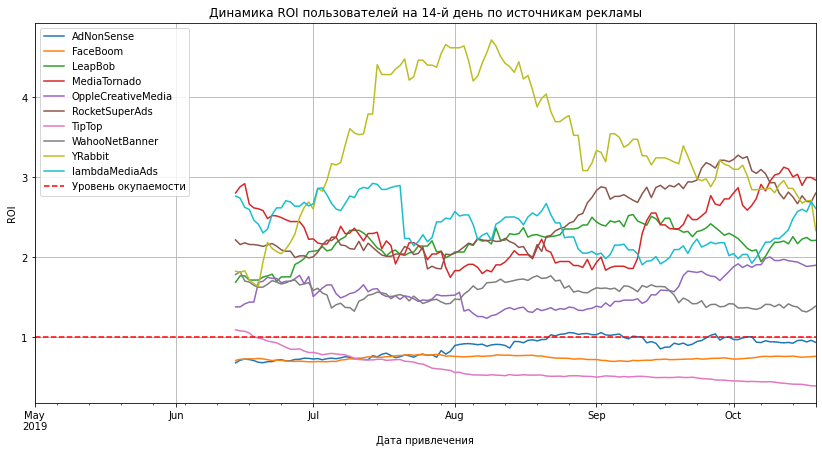

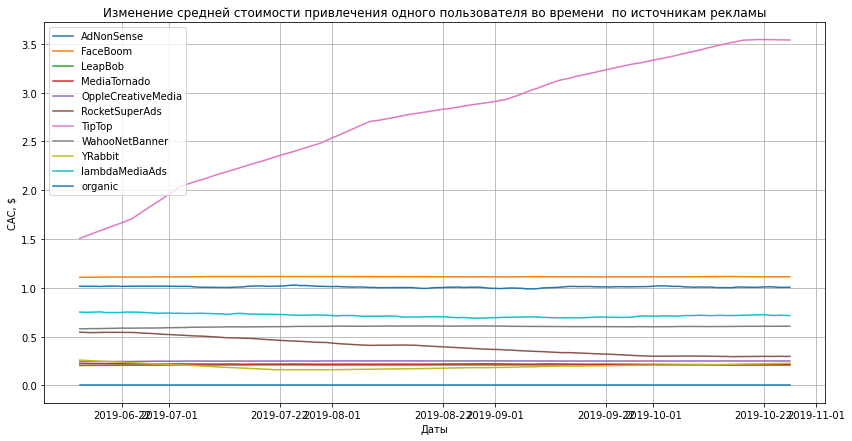

'Страны и рекламные каналы'

region         channel           
France         AdNonSense             1366
               LeapBob                2988
               OppleCreativeMedia     2991
               WahooNetBanner         2971
               lambdaMediaAds          742
               organic                6392
Germany        AdNonSense             1219
               LeapBob                2519
               OppleCreativeMedia     2562
               WahooNetBanner         2579
               lambdaMediaAds          649
               organic                5453
UK             AdNonSense             1295
               LeapBob                3046
               OppleCreativeMedia     3052
               WahooNetBanner         3003
               lambdaMediaAds          758
               organic                6421
United States  FaceBoom              29144
               MediaTornado           4364
               RocketSuperAds         4448
               TipTop                19561
               YRabb

'Устройства и страны'

device   region       
Android  France            5252
         Germany           4440
         UK                5141
         United States    20199
Mac      France            1838
         Germany           1584
         UK                1778
         United States    24842
PC       France            6940
         Germany           5945
         UK                7138
         United States    10432
iPhone   France            3420
         Germany           3012
         UK                3518
         United States    44529
Name: user_id, dtype: int64

In [45]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
window = 45
# считаем ltv, ltv_history, roi, roi_history
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi_cac(
    profiles_CAC,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window) 

#  LTV
#display('Датафрейм LTV', ltv)
ltv.drop(columns=['cohort_size']).T.plot(grid=True, figsize=(14,7))
plt.title('LTV по источникам рекламы')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
#plt.axhline(y=avg_cac_tot, color='red', linestyle='--', label='Средняя стоимость привлечения 1-го пользователя')
plt.legend()
plt.show()

#  ROI
#display('Датафрейм ROI', roi)
roi.drop(columns=['cohort_size', 'cac']).T.plot(grid=True, figsize=(14,7))
plt.title('ROI по источникам рекламы')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='green', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

#  LTV_HISTORY
#display('Датафрейм LTV_HISTORY', ltv_history.head())
columns = [name for name in ltv_history.index.names if name not in ['dt']]
filtered_data = ltv_history.pivot_table(index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')
#display('Датафрейм LTV_HISTORY filtered', filtered_data.head())
filter_data(filtered_data, window).plot(grid=True, figsize=(14,7))
plt.xlabel('Дата привлечения')
plt.title('Динамика LTV пользователей на {}-й день по источникам рекламы'.format(horizon_days))
plt.ylabel('LTV, $')
#plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

#  ROI_HISTORY
#display('Датафрейм ROI_HISTORY', roi_history.head())
columns = [name for name in roi_history.index.names if name not in ['dt']]
filtered_data = roi_history.pivot_table(index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')
#display('Датафрейм ROI_HISTORY filtered', filtered_data.head())
filter_data(filtered_data, window).plot(grid=True, figsize=(14,7))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.xlabel('Дата привлечения')
plt.title('Динамика ROI пользователей на {}-й день по источникам рекламы'.format(horizon_days))
plt.ylabel('ROI')
plt.legend()
plt.show()

#  CAC_HISTORY - построим график измененния средней стоимости привлечения одного пользователя во времени.
cac_history = profiles_CAC.pivot_table(index=['dt'], columns='channel', values='acquisition_cost', aggfunc='mean')
#display('Датафрейм САС_HISTORY', cac_history)
filter_data(cac_history, window).plot(grid=True, figsize=(14,7))
plt.xlabel('Даты')
plt.ylabel('CAC, $')
plt.title('Изменение средней стоимости привлечения одного пользователя во времени  по источникам рекламы')
plt.legend()
plt.show()

# посмотрим на соответствие между странами и рекламными каналами, странами и устройствами.
display('Страны и рекламные каналы', profiles_CAC.groupby(['region','channel'])['user_id'].nunique())
display('Устройства и страны', profiles_CAC.groupby(['device','region'])['user_id'].nunique())

**1. LTV для различных источников рекламы находится в широком диапазоне 0,35-1,8 долл. (на 14 день). Лидером является малобюджетный lambdaMediaAds. Следующий за ним максимально потребляющий средства источник реламы TipTop с показателем 1,5 долл. (на 14 день). Второй по объемам потребления средств канал FaseBoom находится в группе середнячков с показателем 0,8 долл.  
2. Динамика LTV пользователей для всех источников на интервале всего периода май-октябрь не имеет растущих/ниспадающих трендов. Средние уровни достаточно стабильны.  
3. Показатели САС для всех каналов постоянны кроме TipTop и RocketSuperAds. САС для TipTop постоянно, практически линейно растет с июня по сентябрь включительно (с 1,35 долл до 3,6 долл), превышая показатели ближайшего конкурента канала FaseBoom (1,1 долл) в 3,3 раза. На малобюджетный канал RocketSuperAds напротив снижаются расходы на рекламу с 0,55 до 0,3 долл. На всех остальных каналах расходы постоянны и находятся в пределах от 0,20 до 1,1 долл. По каналу organic расходы нулевые.  
4. Характеристики рентабельности ROI демонстрируют, что первые 3 места по расходам на рекламу - каналы TipTop, FaceBoom, AdNonSense - находятся глубоко в зоне убыточности. Только расходы на 7 малобюджетных каналалов рекламы рентабельны и окупаются с различной степенью успешности. При этом следует иметь в виду, что убыточные 3 канала обеспечивают 67% от всех платящих пользователей (и 31% неплатящих) и поэтому их убыточность - это, по сути, убыточность всей деятельности.  
5. Характеристики рентабельности ROI выявляют неэластичность расходов на рекламу в этом виде деятельности и на этом рынке, т.е. увеличение расходов на рекламу, влекущее за собой адекватное увеличение реализации продкта, быстро насыщается и при дальнейшем увеличении расходов уже не приводит к аналогичному росту продаж.  
6. Отсюда же следуют те характеристики по LTV, ROI, CAC в разбивке по странам и устройствам, которые видели ранее. Так в представленной таблице соответствия рекламных источников странам видно, что рекламные источники делятся на 2 большие непересекающиеся группы - источники, работающие в США, и источники, работающие в Европе. Так вот, убыточные 3 каналы это источники рекламы в США. Отсюда и особенности характеристик LTV, ROI, CAC для США. Аналогично, из таблицы соответствия "устройства - страны" видно, что 82% iPhone и 83% Мас приходится на США, в то время, как Android - 67%, РС - 34%. Таким образом, особенности характеристик LTV, ROI, CAC для iPhone и Мас также опосредованное следствие трех основных нерентабельных источников рекламы.  
7. Динамика ROI для различных источников проявляет не очень существенные, но заметные тренды. Так ROI для YRabbit с мая по август росло, а с августа стало падать. ROI для MediaTornado, RocketSuperAds, OppleCreativeMedia имеет заметный повышающий тренд в конце периода. ROI для основного источника рекламы TipTop постоянно снижался в зоне убыточности. Для остальных рекламных каналов ROI в среднем относительно стабильно.**

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно👍 Получается, что дорогие каналы не окупаются

</div>


### Анализ маржинальной прибыли

215962.88

(150008, 9)

105497.29999999999

'Распределение доходов по "user_id":'

,user_id,revenue
0,905723035964,149.88
1,649616333931,140.90
2,897756565239,134.82
3,641347422979,131.83
4,547684681026,129.83
...,...,...
8876,499675789107,4.99
8877,499931699698,4.99
8878,46006712,4.99
8879,500328626970,4.99


(150008, 11)

105497.29999999999

215962.88

'profiles_CAC_rev'

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,revenue,profit
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,14.97,13.881828
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,0.00,-1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,0.00,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,0.00,-0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,0.00,-0.230769
...,...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000,0.00,-3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000,0.00,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000,0.00,-2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714,0.00,-0.205714


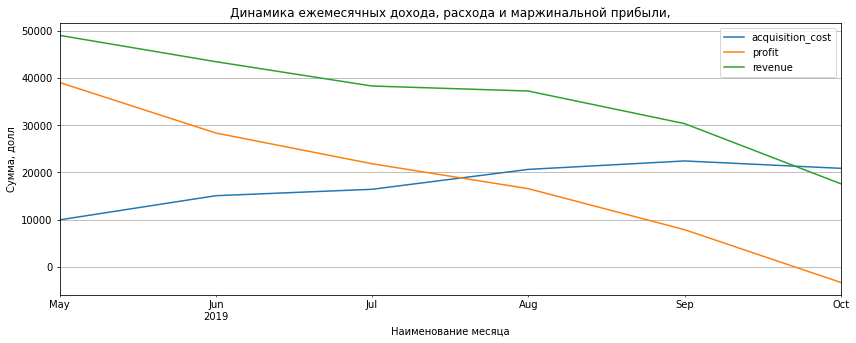

'Динамика ежемесячных дохода, расхода и маржинальной прибыли'

,acquisition_cost,profit,revenue
month,,,
2019-05-01,9978.570,39040.350,49018.92
2019-06-01,15090.045,28357.065,43447.11
2019-07-01,16447.060,21849.220,38296.28
2019-08-01,20657.870,16580.260,37238.13
2019-09-01,22441.340,7903.540,30344.88
2019-10-01,20882.415,-3264.855,17617.56


'Доход, расход и маржинальная прибыль за май-октябрь в разбивке по каналам'

,acquisition_cost,profit,revenue
channel,,,
organic,0.00,46627.23,46627.23
WahooNetBanner,5151.00,14855.63,20006.63
TipTop,54751.30,14823.46,69574.76
RocketSuperAds,1833.00,9765.32,11598.32
LeapBob,1797.60,7762.53,9560.13
lambdaMediaAds,1557.60,7384.10,8941.70
OppleCreativeMedia,2151.25,6214.28,8365.53
YRabbit,944.22,5257.21,6201.43
MediaTornado,954.48,4797.84,5752.32


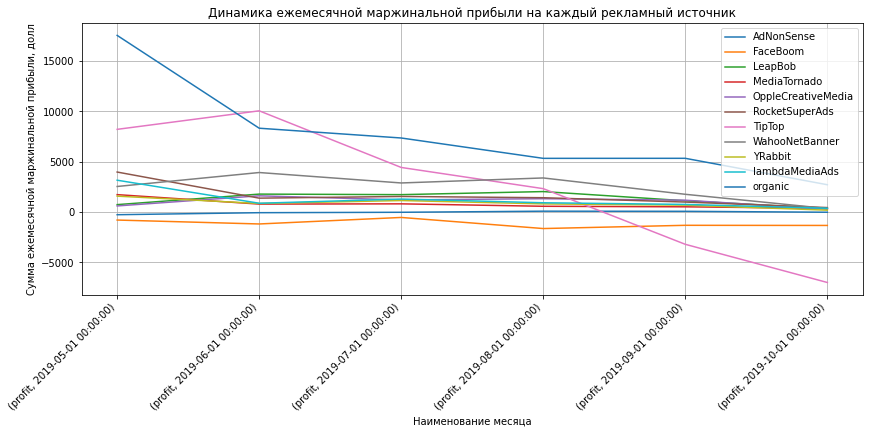

'Динамика ежемесячной маржинальной прибыли на каждый рекламный источник'

channel            AdNonSense  FaceBoom  LeapBob  MediaTornado  \
       month                                                     
profit 2019-05-01     -265.41   -795.58   737.04       1729.81   
       2019-06-01      -64.56  -1184.89  1782.43        790.24   
       2019-07-01      -23.87   -537.56  1728.60        814.73   
       2019-08-01       85.26  -1640.14  2033.70        573.10   
       2019-09-01       73.08  -1317.90  1121.45        519.02   
       2019-10-01      -18.58  -1331.87   359.31        370.94   

channel            OppleCreativeMedia  RocketSuperAds    TipTop  \
       month                                                      
profit 2019-05-01              606.85        3974.580   8217.14   
       2019-06-01             1613.32        1381.035  10058.46   
       2019-07-01             1205.48        1549.450   4430.61   
       2019-08-01             1325.61        1423.900   2323.80   
       2019-09-01             1177.23         992.280  -3206.43   
       2019-10-01              285.79         444.075  -7000.12   

channel            WahooNetBanner  YRabbit  lambdaMediaAds   organic  
       month                                                          
profit 2019-05-01         2539.76  1579.60         3164.18  17552.38  
       2019-06-01         3926.76   850.92          873.88   8329.47  
       2019-07-01         2889.60  1144.34         1290.15   7357.69  
       2019-08-01         3387.60   810.54          921.83   5335.06  
       2019-09-01         1763.34   684.83          757.83   5338.81  
       2019-10-01          348.57   186.98          376.23   2713.82

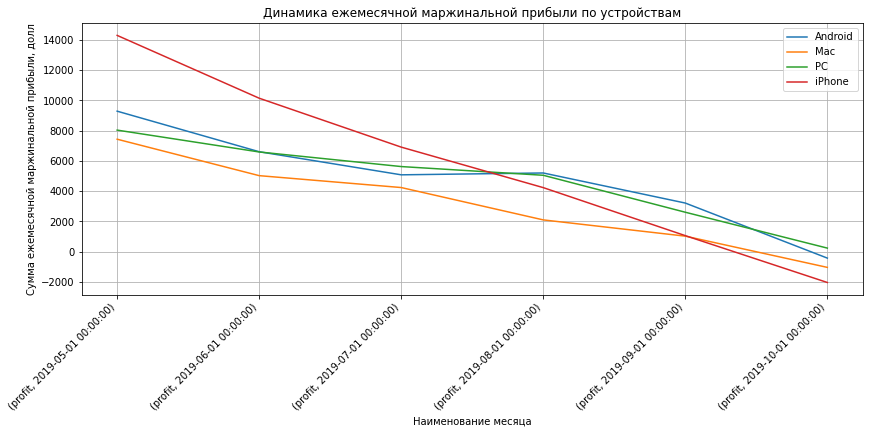

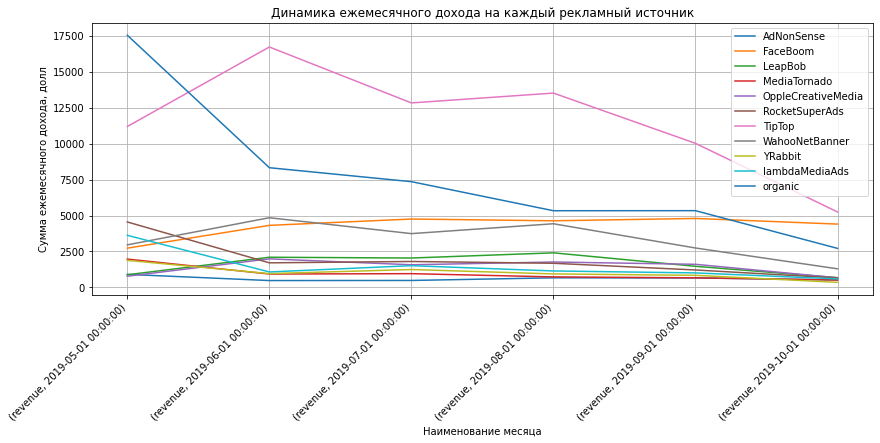

'Динамика ежемесячного дохода на каждый рекламный источник'

channel             AdNonSense  FaceBoom  LeapBob  MediaTornado  \
        month                                                     
revenue 2019-05-01      904.29   2728.82   877.32       1968.37   
        2019-06-01      474.09   4316.21  2097.01        928.24   
        2019-07-01      480.13   4756.74  2042.13        953.21   
        2019-08-01      664.86   4634.26  2403.51        727.66   
        2019-09-01      654.78   4797.00  1465.43        663.74   
        2019-10-01      519.02   4404.63   674.73        511.10   

channel             OppleCreativeMedia  RocketSuperAds    TipTop  \
        month                                                      
revenue 2019-05-01              776.60         4552.56  11198.14   
        2019-06-01             1983.32         1706.75  16734.06   
        2019-07-01             1571.98         1801.52  12840.81   
        2019-08-01             1764.86         1677.01  13525.80   
        2019-09-01             1604.98         1210.68  10026.07   
        2019-10-01              663.79          649.80   5249.88   

channel             WahooNetBanner  YRabbit  lambdaMediaAds   organic  
        month                                                          
revenue 2019-05-01         2958.56  1879.30         3622.58  17552.38  
        2019-06-01         4847.76   957.12         1073.08   8329.47  
        2019-07-01         3741.00  1241.72         1509.35   7357.69  
        2019-08-01         4428.00   935.28         1141.83   5335.06  
        2019-09-01         2740.74   837.62         1005.03   5338.81  
        2019-10-01         1290.57   350.39          589.83   2713.82

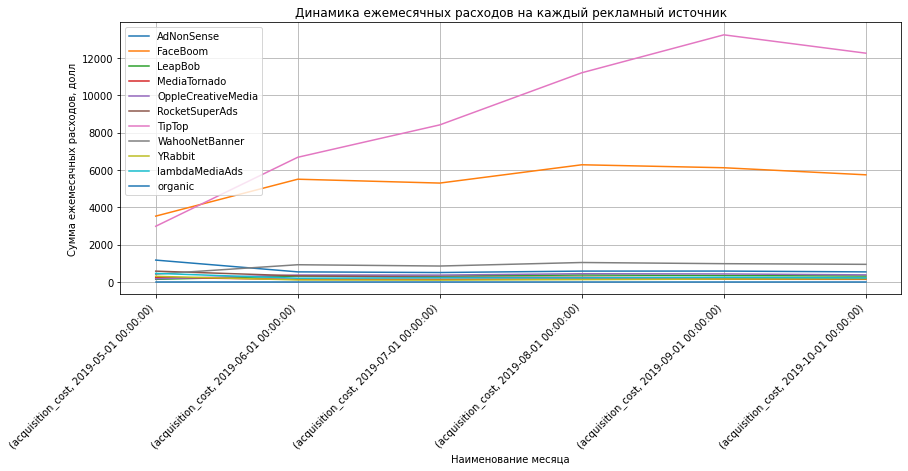

'Динамика ежемесячных расходов на каждый рекламный источник'

channel                      AdNonSense  FaceBoom  LeapBob  MediaTornado  \
                 month                                                     
acquisition_cost 2019-05-01     1169.70    3524.4   140.28        238.56   
                 2019-06-01      538.65    5501.1   314.58        138.00   
                 2019-07-01      504.00    5294.3   313.53        138.48   
                 2019-08-01      579.60    6274.4   369.81        154.56   
                 2019-09-01      581.70    6114.9   343.98        144.72   
                 2019-10-01      537.60    5736.5   315.42        140.16   

channel                      OppleCreativeMedia  RocketSuperAds   TipTop  \
                 month                                                     
acquisition_cost 2019-05-01              169.75         577.980   2981.0   
                 2019-06-01              370.00         325.715   6675.6   
                 2019-07-01              366.50         252.070   8410.2   
                 2019-08-01              439.25         253.110  11202.0   
                 2019-09-01              427.75         218.400  13232.5   
                 2019-10-01              378.00         205.725  12250.0   

channel                      WahooNetBanner  YRabbit  lambdaMediaAds  organic  
                 month                                                         
acquisition_cost 2019-05-01           418.8   299.70           458.4      0.0  
                 2019-06-01           921.0   106.20           199.2      0.0  
                 2019-07-01           851.4    97.38           219.2      0.0  
                 2019-08-01          1040.4   124.74           220.0      0.0  
                 2019-09-01           977.4   152.79           247.2      0.0  
                 2019-10-01           942.0   163.41           213.6      0.0

In [46]:
display(orders['revenue'].sum())
#costs['dt_month'] = (pd.to_datetime(costs['dt'])).dt.month 
#profiles_CAC = get_profiles_CAC(visits, orders, events, costs, event_names=[])
display(profiles_CAC.shape, profiles_CAC['acquisition_cost'].sum())


# получим данные по суммарным доходам в группироввке по 'user_id'
distr_rev = orders.groupby('user_id')['revenue'].sum().sort_values(ascending=False).reset_index()
display('Распределение доходов по "user_id":', distr_rev)

# добавим к профилю пользователей с САС еще и данные по доходам
profiles_CAC_rev = profiles_CAC.merge(distr_rev, on='user_id', how='left').fillna(0)

# добавим столбец 'profit'
profiles_CAC_rev['profit'] = profiles_CAC_rev['revenue'] - profiles_CAC_rev['acquisition_cost']
display(profiles_CAC_rev.shape, profiles_CAC_rev['acquisition_cost'].sum(), profiles_CAC_rev['revenue'].sum())
display('profiles_CAC_rev', profiles_CAC_rev)

channel_exp_rev = profiles_CAC_rev.pivot_table(index=['month'],\
                                               values=['acquisition_cost', 'revenue', 'profit'], aggfunc='sum')
channel_exp_rev.plot(grid=True, figsize=(14,5))
plt.title('Динамика ежемесячных дохода, расхода и маржинальной прибыли,')
plt.xlabel('Наименование месяца')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Сумма, долл')
plt.legend()
plt.show()   

display('Динамика ежемесячных дохода, расхода и маржинальной прибыли', channel_exp_rev)


# получим таблицу доходов, расходов, маржинальной прибыли в разбивке по каналам
channel_exp_rev = profiles_CAC_rev.pivot_table(index=['channel'],\
                                               values=['acquisition_cost', 'revenue', 'profit'], aggfunc='sum')
display('Доход, расход и маржинальная прибыль за май-октябрь в разбивке по каналам',\
        channel_exp_rev.sort_values(by='profit', ascending=False))

# построим график маржинальной прибыли в разбивке по каналам по месяцам
profiles_CAC_rev.pivot_table(index=['channel'], columns='month',\
                             values=['profit'], aggfunc='sum').T.plot(grid=True, figsize=(14,5))
plt.title('Динамика ежемесячной маржинальной прибыли на каждый рекламный источник')
plt.xlabel('Наименование месяца')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Сумма ежемесячной маржинальной прибыли, долл')
plt.legend()
plt.show() 

display('Динамика ежемесячной маржинальной прибыли на каждый рекламный источник',\
        profiles_CAC_rev.pivot_table(index=['channel'], columns='month', values=['profit'], aggfunc='sum').T)

# построим график маржинальной прибыли в разбивке по устройствам по месяцам
profiles_CAC_rev.pivot_table(index=['device'], columns='month',\
                             values=['profit'], aggfunc='sum').T.plot(grid=True, figsize=(14,5))
plt.title('Динамика ежемесячной маржинальной прибыли по устройствам')
plt.xlabel('Наименование месяца')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Сумма ежемесячной маржинальной прибыли, долл')
plt.legend()
plt.show() 


# построим график доходов в разбивке по каналам по месяцам
profiles_CAC_rev.pivot_table(index=['channel'], columns='month',\
                             values=['revenue'], aggfunc='sum').T.plot(grid=True, figsize=(14,5))
plt.title('Динамика ежемесячного дохода на каждый рекламный источник')
plt.xlabel('Наименование месяца')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Сумма ежемесячного дохода, долл')
plt.legend()
plt.show() 

display('Динамика ежемесячного дохода на каждый рекламный источник',\
        profiles_CAC_rev.pivot_table(index=['channel'], columns='month', values=['revenue'], aggfunc='sum').T)

# построим график расходов в разбивке по каналам по месяцам
profiles_CAC_exp = profiles_CAC_rev.pivot_table(index=['channel'], columns='month',\
                             values=['acquisition_cost'], aggfunc='sum')
profiles_CAC_exp.T.plot(grid=True, figsize=(14,5))
plt.title('Динамика ежемесячных расходов на каждый рекламный источник')
plt.xlabel('Наименование месяца')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Сумма ежемесячных расходов, долл')
plt.legend()
plt.show()   

display('Динамика ежемесячных расходов на каждый рекламный источник', profiles_CAC_exp.T)


**1. За период май-октябрь доходы еще превышают расходы, но ежемесячные доходы сентября уже ниже расходов, т.е. по итогу месяца уже убыток. Тем более, это верно для 2-х недельного срока, установленного в бизнес-плане, т.е. по итогам 2-х недель вместо прибыли - убыток.  
2. Роль "органических" пользователей весьма существенна. Более того, начиная с середины июля прибыль от этих пользователей становится преобладающей. По доходу "органические" пользователи" уступают только пользователям от канала TipTop, но с учетом расходов на этот канал, т.е. по прибыли, они впереди.  
Роль остальных каналов в маржинальной прибыли весьма скромная.  
3. Прибыль от "органических" пользователей в течение всего периода снижается и в октябре уже невелика и имеет тенденцию уйти в минус в ноябре.**

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Согласен

</div>


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Общий вывод.  
Проведен агализ полученных трех датасетов. Файл visits_info_short.csv, содержащий лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.  

Были выполнены следующие работы:  
- изучены файлы, 
- проведена предообработка данных 
    - определены и обработаны пропуски
    - устранены явные и неявные дубликаты
    - скорректированы типы данных
    - переименованы столбцы
    - проверено наличие явных и неявных дубликатов
- проведен исследовательский анализ данных:
    - сформированы профили пользователей
    - изучены страны, из которых приходят пользователи
    - изучены устройства, с которых приходят пользователи
    - рассмотрены каналы привлечения пользователей
- проведен анализ маркетинговой деятельности
    - определена общая сумма расходов на рекламу и распределение этой суммы по рекламным источникам
    - определена средняя стоимость привлечения одного покупателя
    - представлена визуализация динамики изменения расходов
- проведен анализ окупаемости рекламы в разрезах стран, устройств, рекламных каналов
- проведен предварительный анализ маржинальной прибыли
- представлены выводы и рекомендации
    
По результатам анализа можно сделать следующие выводы:  
1. Расходы на привлечение пользователей через рекламные источники неэффективны. При увеличении расходов на рекламу достаточно быстро наступает насыщение рекламного канала и число пользователей не увеличивается с увеличением расходов. Прибыль от рекламы через канал TipTop росла только в мае, далее только падала (при росте вложений в эту рекламу) и в сентябре ушла в убытки.
2. Малобюджетные каналы рекламы более стабильны. Для некоторых из них отмечен тренд к росту рентабельности к концу периода. Недостатком этих каналов является не очень большой приток клиентов, но при этом эти каналы и средств потребляют немного.
3. Велика роль "органических" пользователей. Их вклад значителен, по прибыли, можно сказать, преобладающий. Тем не менее, прибыль от них также монотонно снижается в течение всего периода май-октябрь.  
4. Было показано, что отклонения в характеристиках рентабельности для стран и видов устройств связаны не столько с особенностями стран или устройств (такие особенности не удалось выявить), а с опосредованным влиянием все той же неэффективной рекламы.  

По итогам, соответственно, можно рекомендовать:
1. пересмотреть, проверить таргетные группы пользователей для данного продукта и соответствующие этим группам каналы рекламы  
2. постоянно контролировать рентабельность рекламы и при снижении рентабельности, появлении признаков насыщения канала останавливать финансирование  
3. расширять сеть малобюджетных каналов рекламы при постоянном контроле рентабельности (принцип "курочка по зернышку"), обратив внимание, например, на каналы MediaTornado, RocketSuperAds, OppleCreativeMedia, которые имеют заметный повышающий тренд в конце периода.  
4. обратить внимание на "органический" сегмент и способы рекламирования, продвижения продукта в этом сегменте
5. провести дополнительное изучение возможных причин монотонного падения дохода и прибыли с "органического" рынка, исключить возможность существенного несовершенства продвигаемого продукта и обоснованной потери интереса к нему после ознакомления.


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно, а еще можно повысить удержание для пользователей из США, например с помощью введения персонализированных UX-стратегий, e-mail рассылок, персональных рекомендаций, push-уведомлений. Можно ввести определённые "награды" или привилегии для постоянных пользователей. Для канала FaceBoom можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками. Также, можно ввести поощрение пользователей за репосты контента и прочий социальный engagement, связанный с приложением, в данном канале.

</div>
<div class="alert alert-block alert-info"> Очень интересно. Не все слова мне здесь знакомы, но это погуглим или, скорее, пояндексим. Но, прошу тебя уточнить, я не смог этого увидеть, 
1. что именно не так с таргетированием в FaceBoom и почему только в FaceBoom? А TipTop? В чем между ними разница?    

2. перечисленные тобою доп.методы - методы из мира интернет-торговли, но "органики" приходят неохваченные всеми этими мерами и их довольно много, вполне сравнимо с не"органиками". Как можно/нужно простимулировать их, какой рекламой охватить? И как понять причину монотонного спада со временем в количестве "органиков" и их покупок?</div> 
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   1. Дополнительно рекомендую построить графики конверсии и удержания по каналам также, как ты построил их по странам - на них можно увидеть, что конверсия у FaceBoom, в отличие от TipTop хорошая. А вот удержание у канала слабое. Настройка таргета на целевую аудиторию поможет его улучшить 
   2. Вообще, данные советы - это уже работа маркетологов, но и нам, как аналитикам, этот материал будет полезным для профессионального развития. Вот статья, в которой рассмотрены основные причины снижения органического трафика: https://www.insales.ru/blogs/university/snizhenie-organicheskogo-trafika
    И по стимулированию - статья довольно большая, и написана для маркетологов, но простым языком: https://sales-generator.ru/blog/organicheskiy-trafik/
    

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Игорь, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>
 
<div class="alert alert-block alert-info"> Все замечания учел. Исправления внес. Изменения отразил и прокомментировал. Общая картина для Procrastinate Pro+ стала более критичной (характеристики рентабельности еще более снизились), но принципиально та же. Поэтому в Общие выводы изменения не внес, в силу общности выводов и рекомендаций и сохранения характера ситуации в целом.


Михаил, большое спасибо за уделенное время, ревью, замечания и советы!</div> 

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Игорь, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>